In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from plotly.offline import iplot
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)


In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [4]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [5]:
train['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [8]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [11]:
data = train.copy()
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']
len(categorical_features)
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
#NUMBER OF CAREGOURY IN A CATEGORICAL FEATURE
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

## Data fields
###### Here's a brief version of what you'll find in the data description file.

*    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*    MSSubClass: The building class---------------------------------------------------S/N(STRUCTURAL/DON'T KNOW)
*    MSZoning: The general zoning classification--------------------------------------L(LOCATIONAL)
*    LotFrontage: Linear feet of street connected to property-------------------------F(FACILITIES)
*    LotArea: Lot size in square feet-------------------------------------------------L/F
*    Street: Type of road access------------------------------------------------------F
*    Alley: Type of alley access------------------------------------------------------F
*    LotShape: General shape of property----------------------------------------------S
*    LandContour: Flatness of the property--------------------------------------------S
*    Utilities: Type of utilities available-------------------------------------------F
*    LotConfig: Lot configuration-----------------------------------------------------S
*    LandSlope: Slope of property-----------------------------------------------------S
*    Neighborhood: Physical locations within Ames city limits-------------------------L
*    Condition1: Proximity to main road or railroad-----------------------------------L
*    Condition2: Proximity to main road or railroad (if a second is present)----------L
*    BldgType: Type of dwelling(বসবাসের ধরণ)------------------------------------------F
*    HouseStyle: Style of dwelling----------------------------------------------------F
*    OverallQual: Overall material and finish quality---------------------------------Q(QUALITATIVE)
*    OverallCond: Overall condition rating--------------------------------------------Q
*    YearBuilt: Original construction date--------------------------------------------T(TIME RELATED)
*    YearRemodAdd: Remodel date-------------------------------------------------------T
*    RoofStyle: Type of roof----------------------------------------------------------S
*    RoofMatl: Roof material----------------------------------------------------------S
*    Exterior1st: Exterior covering on house------------------------------------------S
*    Exterior2nd: Exterior covering on house (if more than one material)--------------S
*    MasVnrType: Masonry veneer type--------------------------------------------------F/Q
*    MasVnrArea: Masonry veneer area in square feet-----------------------------------S
*    ExterQual: Exterior material quality---------------------------------------------Q
*    ExterCond: Present condition of the material on the exterior---------------------Q
*    Foundation: Type of foundation---------------------------------------------------S
*    BsmtQual: Height of the basement-------------------------------------------------S
*    BsmtCond: General condition of the basement--------------------------------------Q
*    BsmtExposure: Walkout or garden level basement walls-----------------------------S
*    BsmtFinType1: Quality of basement finished area----------------------------------Q
*    BsmtFinSF1: Type 1 finished square feet------------------------------------------S
*    BsmtFinType2: Quality of second finished area (if present)-----------------------Q
*    BsmtFinSF2: Type 2 finished square feet------------------------------------------Q
*    BsmtUnfSF: Unfinished square feet of basement area-------------------------------Q
*    TotalBsmtSF: Total square feet of basement area-----------------------------------S
*    Heating: Type of heating---------------------------------------------------------F
*    HeatingQC: Heating quality and condition-----------------------------------------Q
*    CentralAir: Central air conditioning---------------------------------------------S(BASED ON AVAILABLE OR NOT)
*    Electrical: Electrical system----------------------------------------------------Q
*    1stFlrSF: First Floor square feet------------------------------------------------S
*    2ndFlrSF: Second floor square feet---------------------------------------------------S
*    LowQualFinSF: Low quality finished square feet (all floors)-----------------------Q
*    GrLivArea: Above grade (ground) living area square feet---------------------S
*    BsmtFullBath: Basement full bathrooms----------------------------------------S
*    BsmtHalfBath: Basement half bathrooms-----------------------------------------S
*    FullBath: Full bathrooms above grade---------------------------------------------S
*    HalfBath: Half baths above grade--------------------------------------------S
*    Bedroom: Number of bedrooms above basement level-----------------------------------S
*    Kitchen: Number of kitchens-----------------------------------------------------S
*    KitchenQual: Kitchen quality--------------------------------------------------Q
*    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-----------------S
*    Functional: Home functionality rating------------------------------------------Q
*    Fireplaces: Number of fireplaces---------------------------------------------S
*    FireplaceQu: Fireplace quality--------------------------------------------------Q
*    GarageType: Garage location------------------------------------------------L
*    GarageYrBlt: Year garage was built------------------------------------------------------T
*    GarageFinish: Interior finish of the garage---------------------------------------------Q
*    GarageCars: Size of garage in car capacity-------------------------------S
*    GarageArea: Size of garage in square feet----------------------------------------S
*    GarageQual: Garage quality-------------------------------------------------------------Q
*    GarageCond: Garage condition----------------------------------------------Q
*    PavedDrive: Paved driveway------------------------------------------------S
*    WoodDeckSF: Wood deck area in square feet---------------------------------S
*    OpenPorchSF: Open porch area in square feet---------------------------------S
*    EnclosedPorch: Enclosed porch area in square feet-------------------------------S
*    3SsnPorch: Three season porch area in square feet-----------------------------S
*    ScreenPorch: Screen porch area in square feet-----------------------------------S
*    PoolArea: Pool area in square feet---------------------------------------------S
*    PoolQC: Pool quality----------------------------------------------------Q
*    Fence: Fence quality------------------------------------------------------------Q
*    MiscFeature: Miscellaneous feature not covered in other categories-------------F
*    MiscFeature: Miscellaneous feature not covered in other categories--------------F
*    MiscVal: Value of miscellaneous feature-------------------------------------------Q
*    MoSold: Month Sold----------------------------------------------------------------T
*    YrSold: Year Sold----------------------------------------------------------T
*    SaleType: Type of sale------------------------------------------------SELLING
*    SaleCondition: Condition of sale------------------------------------------------SELLING
: Condition of sale
    
38-50
66-75

### Most Important features According to me:
- area of the house(LotArea)
- shape of the area(LotShape,LandContour)
- number of floors(not mentioned)
- no. of rooms(not mentioned)
- no. of fireplaces & it's quality(Fireplaces,FireplaceQu)
- size of room(GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF)
- basment size (TotalBsmtSF)
- Masonry veneer area size(MasVnrArea)
- porch size(OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch)
- presance of garage and it's size(GarageType, GarageYrBlt, GarageFinish, GarageCars,GarageArea,GarageQual,GarageCond)
- presence of suiatable lane(LotFrontage,LotArea,Street)
- neighbours(Neighborhood)
- selling time(MoSold,YrSold)
- year made(YearBuilt)
- elactrical system(Electrical)
- number of bed room(Bedroom)
- quality of kitchen(Kitchen,KitchenQual)
- remodeling date(YearRemodAdd)
- foundation type(Foundation)
- bathroom (FullBath,HalfBath)
- no. of rooms(TotRmsAbvGrd)
- rural or not
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
- area of the house(LotArea)[CON]
- shape of the area(LotShape[CAT],LandContour[CAT])
- number of floors(not mentioned)
- no. of fireplaces & it's quality(Fireplaces[DIS],FireplaceQu[CAT])
- size of room(GrLivArea[CON],1stFlrSF[CON],2ndFlrSF[CON],LowQualFinSF[DIS])
- basment size (TotalBsmtSF[CON])
- Masonry veneer area size(MasVnrArea[CON])
- porch size(OpenPorchSF[CON],EnclosedPorch,3SsnPorch,ScreenPorch)
- presance of garage and it's size(GarageType, GarageYrBlt, GarageFinish, GarageCars,GarageArea,GarageQual,GarageCond)
- presence of suiatable lane(LotFrontage,LotArea,Street)
- neighbours(Neighborhood)
- selling time(MoSold,YrSold)
- year made(YearBuilt)
- elactrical system(Electrical)
- number of bed room(Bedroom)
- quality of kitchen(Kitchen,KitchenQual)
- remodeling date(YearRemodAdd)
- foundation type(Foundation)
- bathroom (FullBath,HalfBath)
- no. of rooms(TotRmsAbvGrd)
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



'MSSubClass',--1
 'OverallQual',--1
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',--1
 'HalfBath',--1
 'BedroomAbvGr',--1
 'KitchenAbvGr',--1
 'TotRmsAbvGrd',--1
 'Fireplaces',--1
 'GarageCars',--1
 '3SsnPorch',--2
 'PoolArea',--2
 'MiscVal',--1
 'MoSold'--1









###### QUALITY######

OverallQua

OverallCond

MasVnrArea

ExterCond

Foundation

BsmtCond

BsmtFinType1

BsmtFinType2

BsmtFinSF2

BsmtUnfSF

HeatingQC

Electrical

LowQualFinSF

KitchenQual

Functional: Home functionality rating

FireplaceQu: Fireplace quality-

GarageFinish

GarageQual

Fence

MiscVal

MasVnrType


##### STRUCTURE ######


MSSubClass

LotShape

LandContour

LotConfig

LandSlope

RoofStyle

RoofMatl

Exterior1st

Exterior2nd

MasVnrArea

BsmtQual

BsmtExposure

BsmtFinSF1

TotalBsmtSF

CentralAir

1stFlrSF

2ndFlrSF

GrLivArea

BsmtFullBath

BsmtHalfBath

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen

TotRmsAbvGrd

Fireplaces

GarageCars

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea

GarageType


##### LOCATION ######
MSSubClass

LotArea(L/F)

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2



###### FACILITES#######

LotFrontage

LotArea

Street

Alley

Utilities

BldgType: Type of dwelling(বসবাসের ধরণ)

HouseStyle

MasVnrType

Heating

MiscFeature: Miscellaneous feature not covered in other categories

MiscFeature

##### TIME#####

YearBuilt

YearRemodAdd

GarageYrBlt

MoSold: Month Sold

YrSold

##### SEAL#####

SaleType: Type of sale

SaleCondition




















In [13]:
# HOW THE continious neumerical VARIABLES ARE CHANGING WITH TERGATE VARIABLE
# BAR COUNT OF CATEGORICAL VATIABLE
# HISTOGRAM FOR CONTINIOUS NEUMERICAL VARIABLE TO FIND OUT THE DISTRIBUTION
# BOX PLOT FOR FINDING OUTLIERS
# CDFs

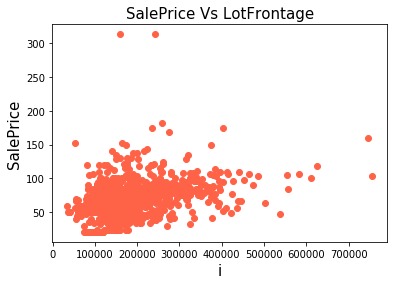

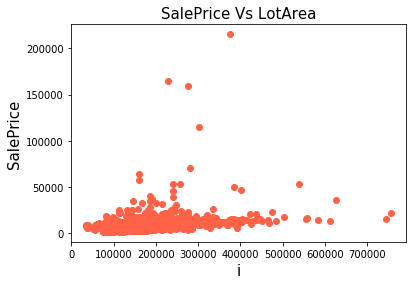

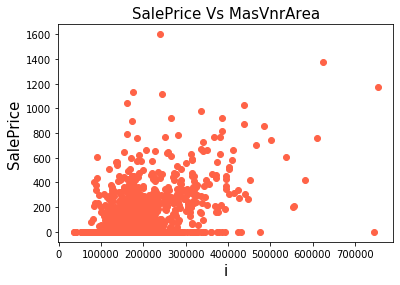

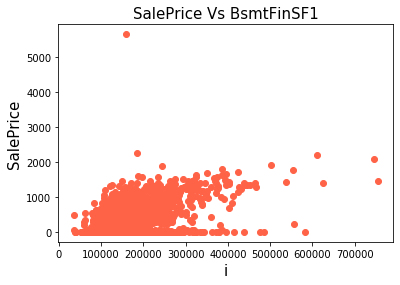

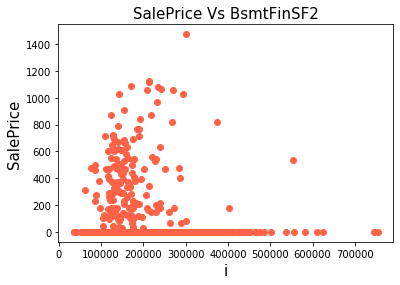

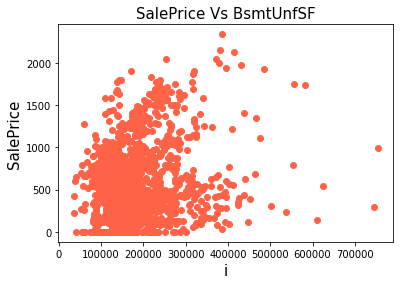

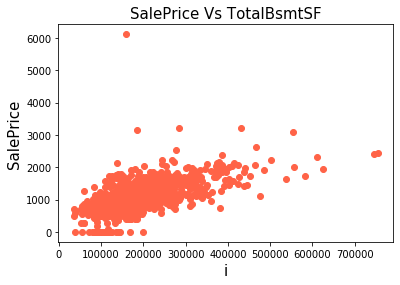

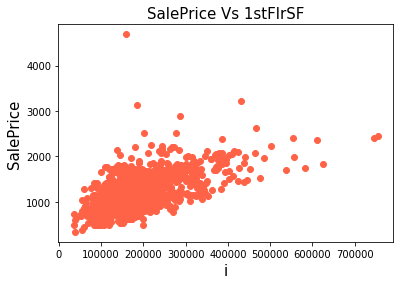

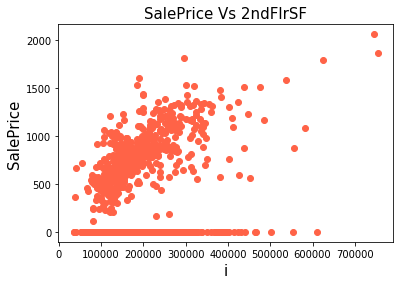

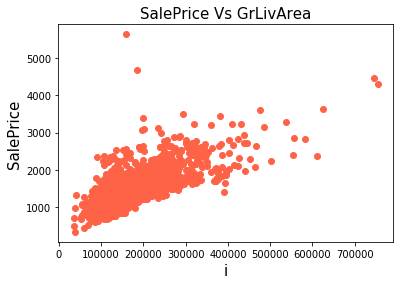

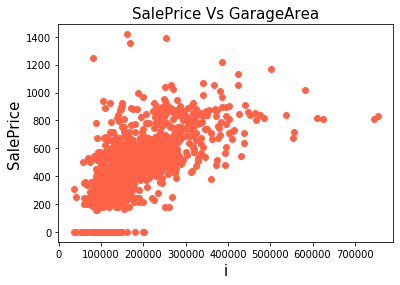

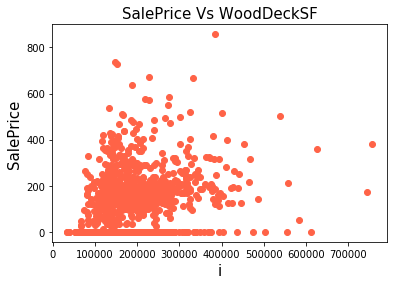

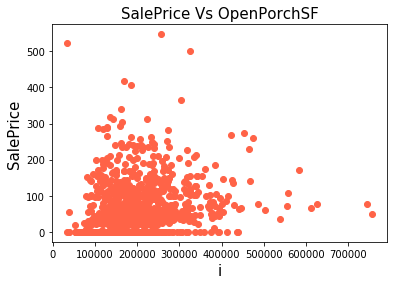

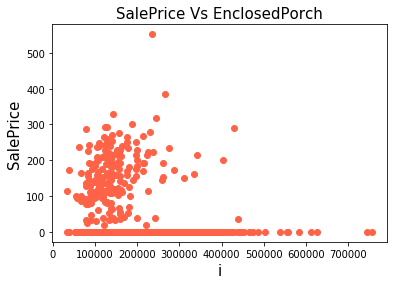

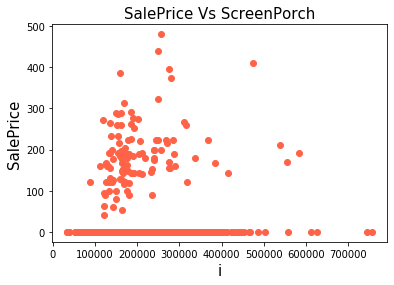

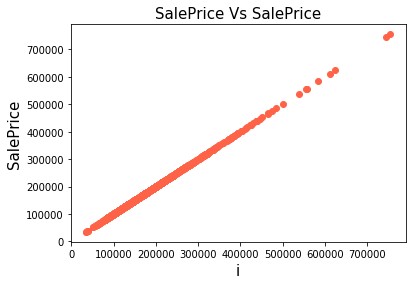

In [14]:
for i in continuous_feature:
    
    plt.scatter(train['SalePrice'],train[i],color = 'tomato')
    plt.xlabel("i",size = 15)
    plt.ylabel('SalePrice',size = 15)
    plt.title('SalePrice Vs '+ i,size = 15)
    plt.show()

In [15]:
for i in continuous_feature:
    train[i]


In [16]:
train[continuous_feature[0]].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

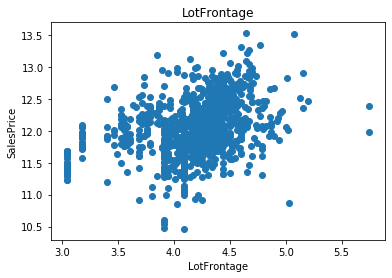

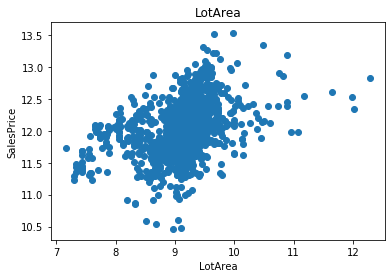

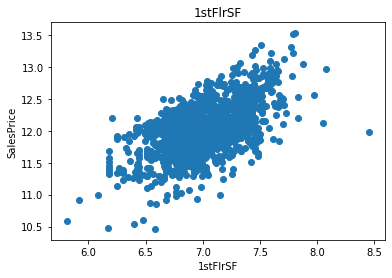

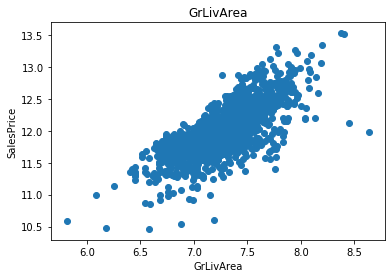

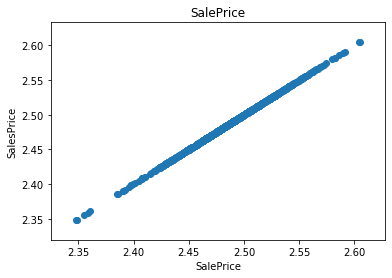

In [17]:
#LOGNORMAL DISTRIBUTION

for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [18]:
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
features_with_na


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


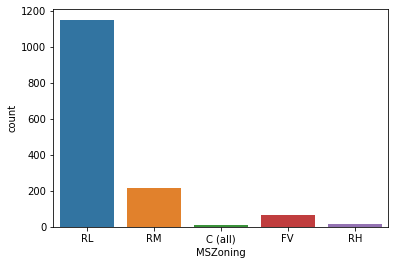

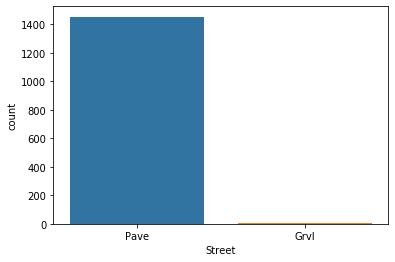

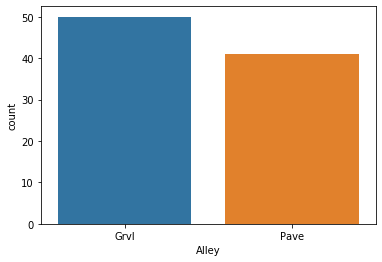

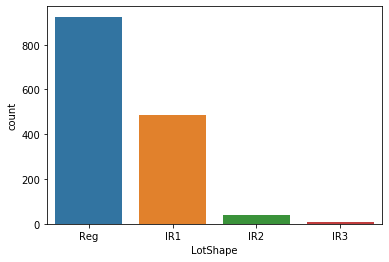

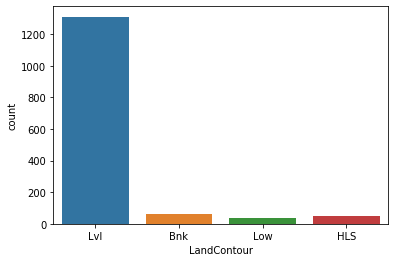

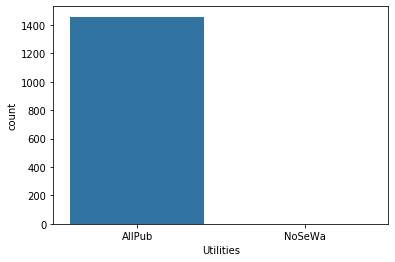

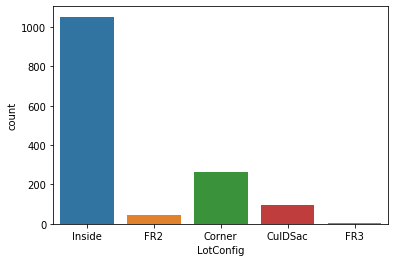

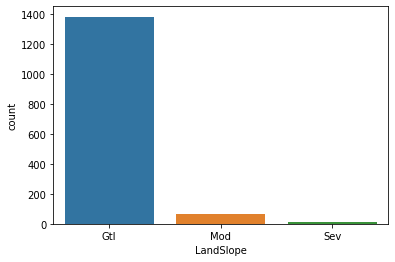

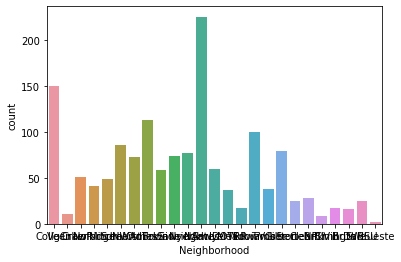

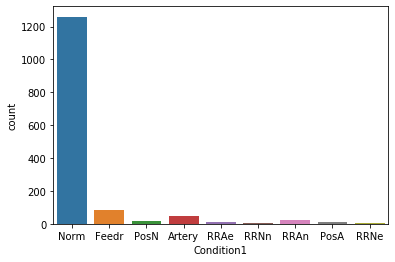

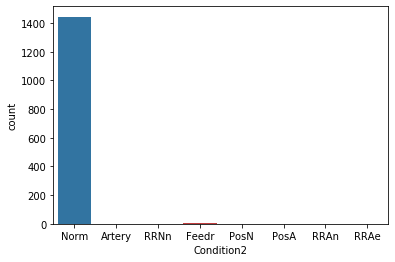

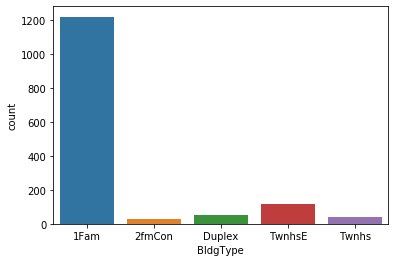

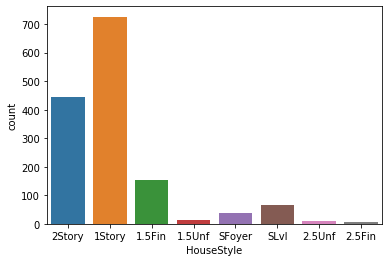

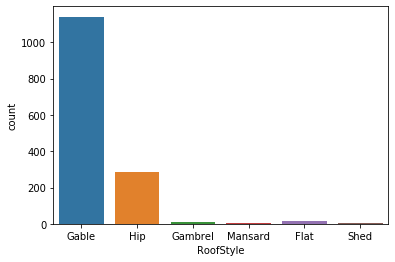

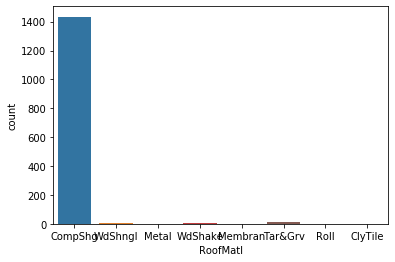

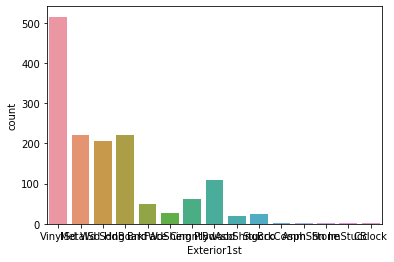

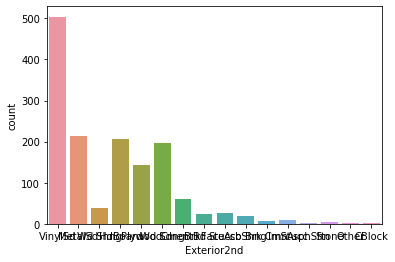

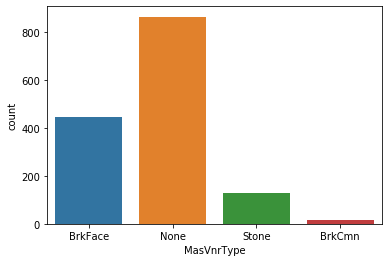

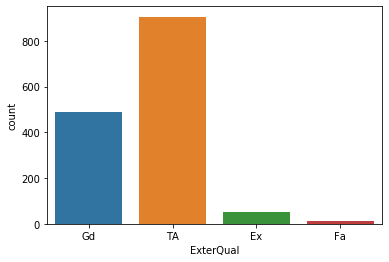

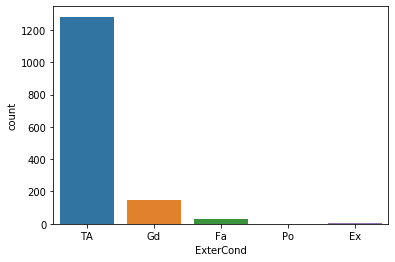

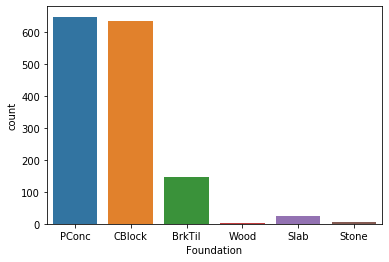

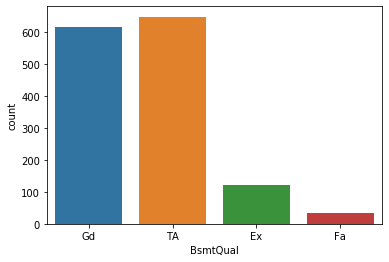

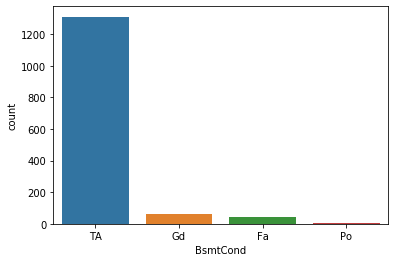

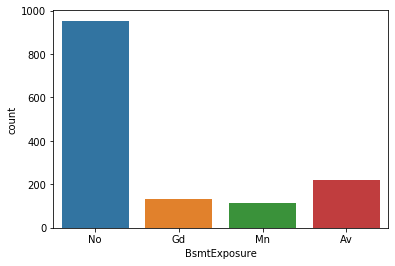

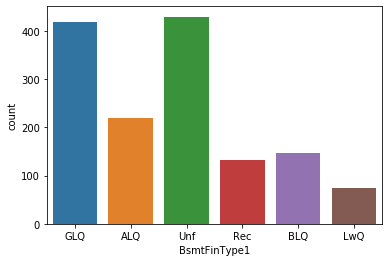

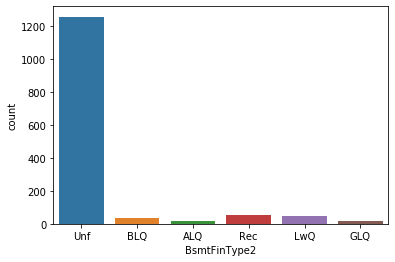

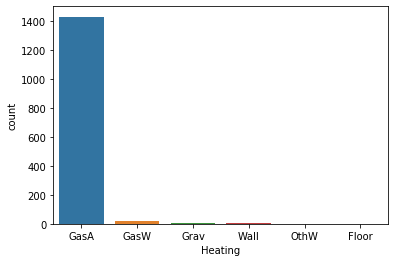

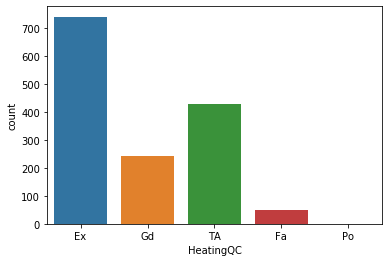

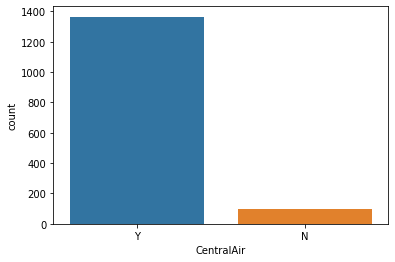

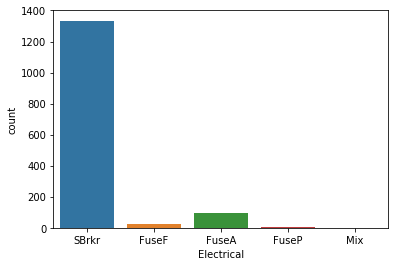

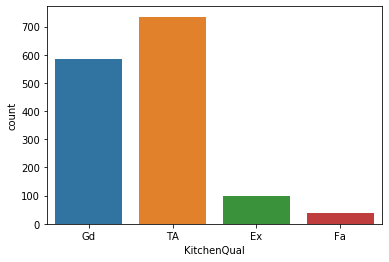

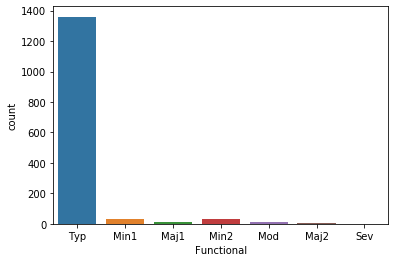

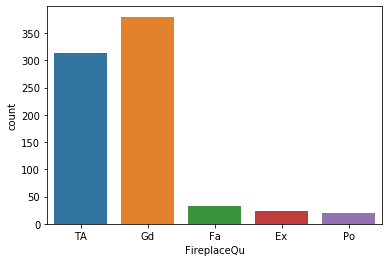

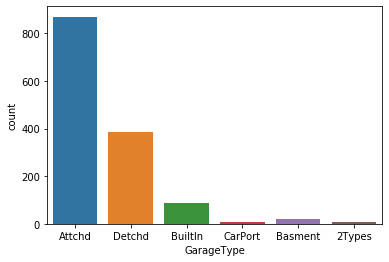

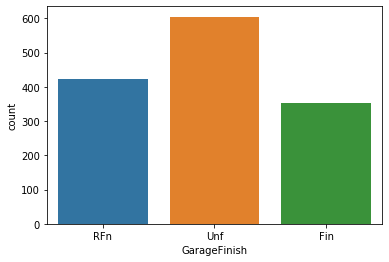

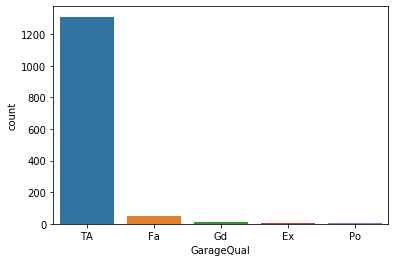

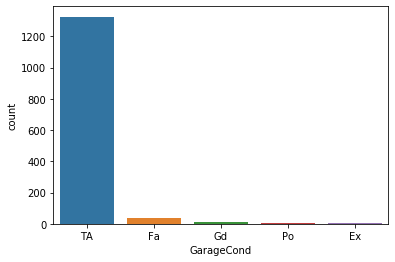

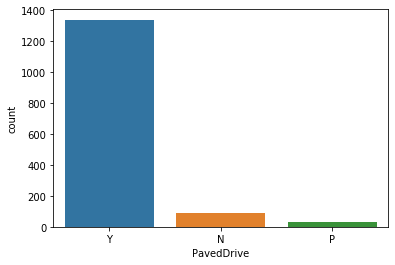

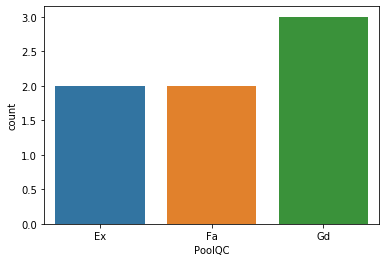

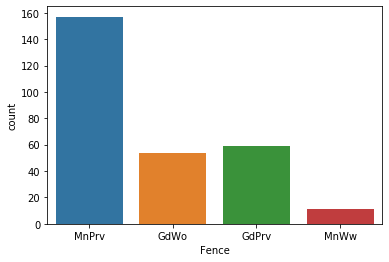

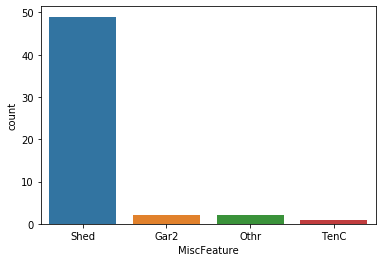

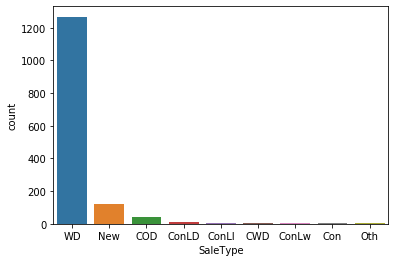

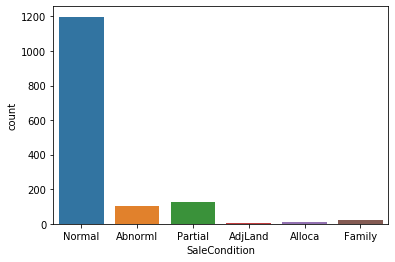

In [20]:
for i in categorical_features:
    sns.countplot(x=i,data=train)
    plt.show()

In [21]:
categorical_features[2]

'Alley'

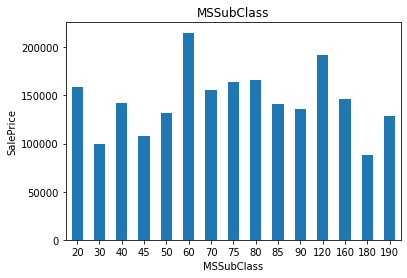

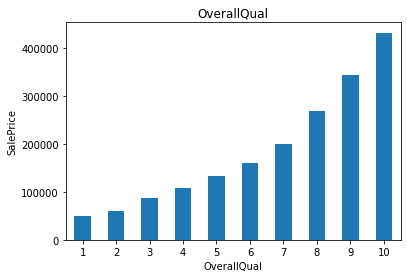

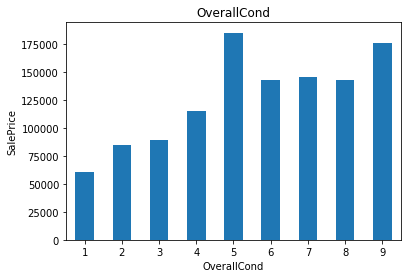

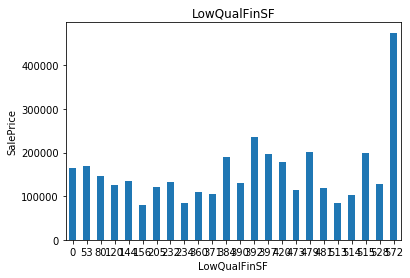

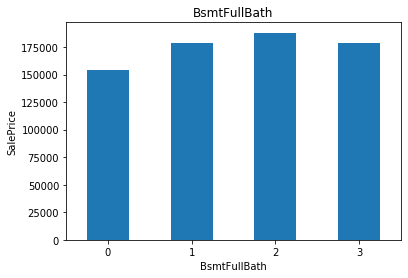

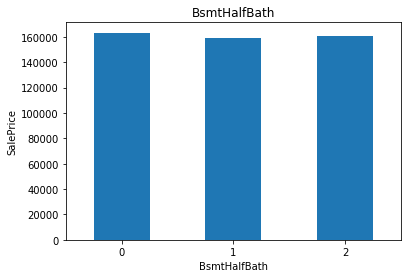

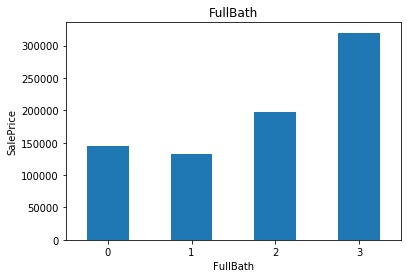

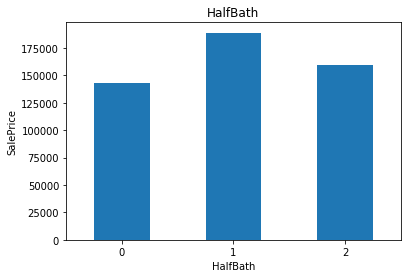

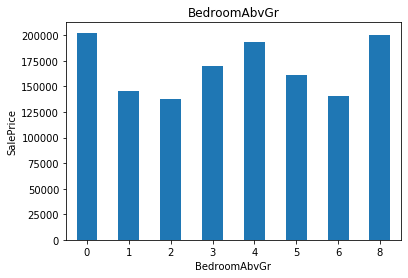

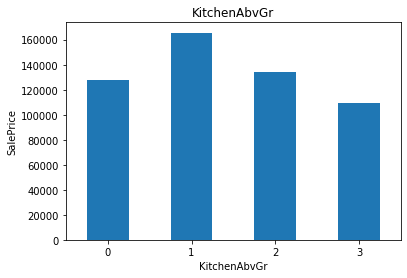

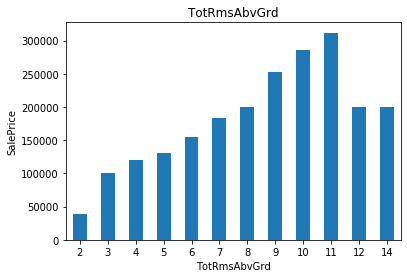

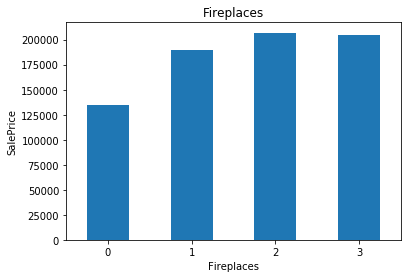

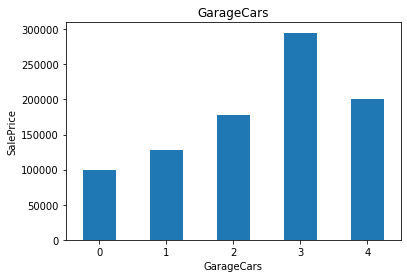

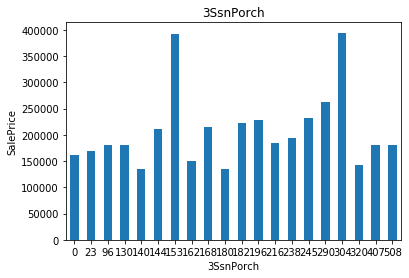

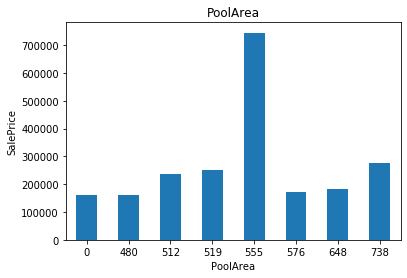

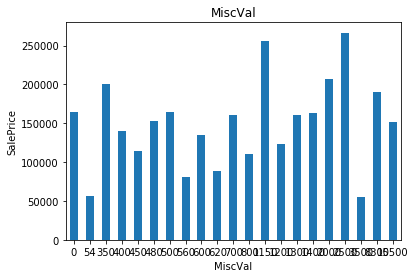

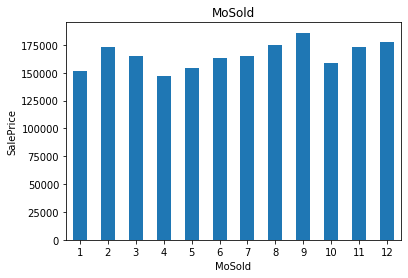

In [22]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Univariate Analysis:

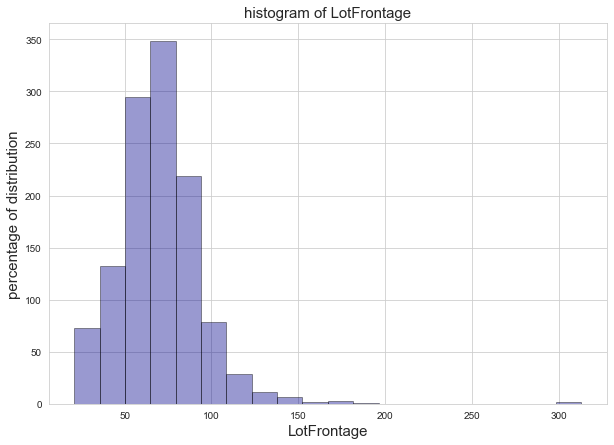

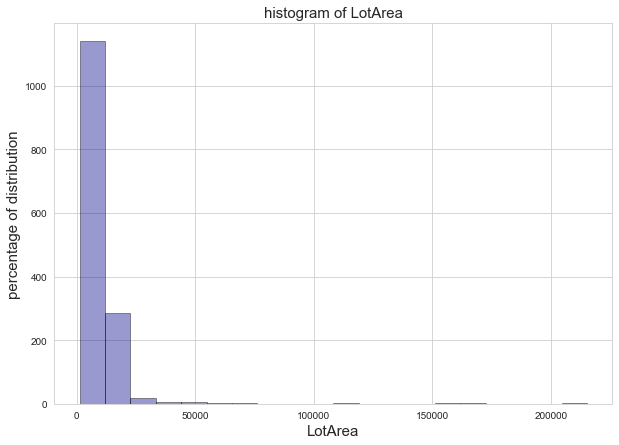

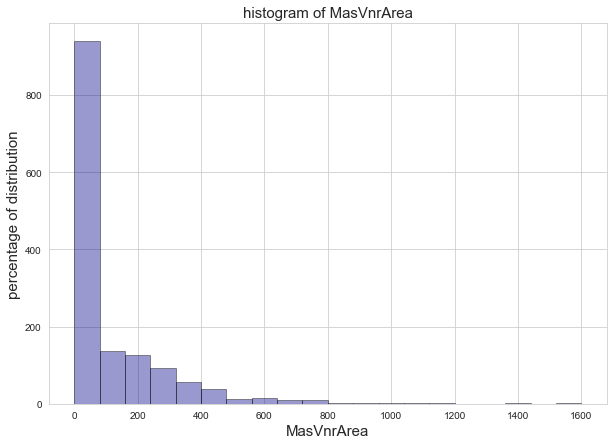

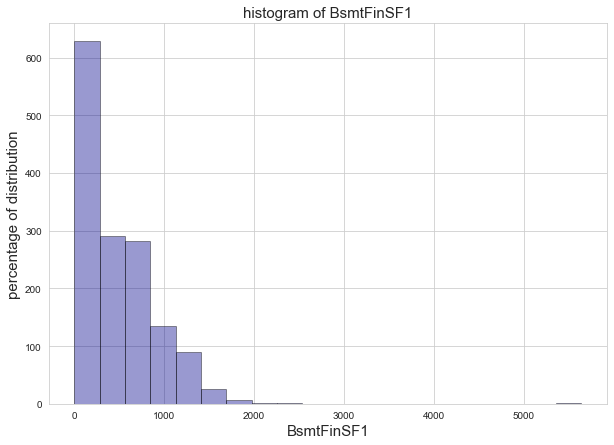

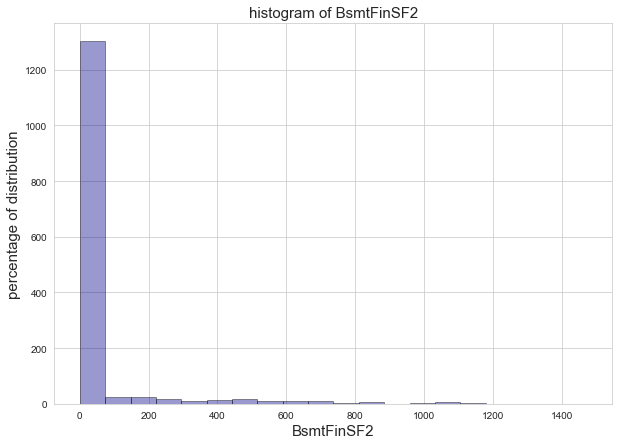

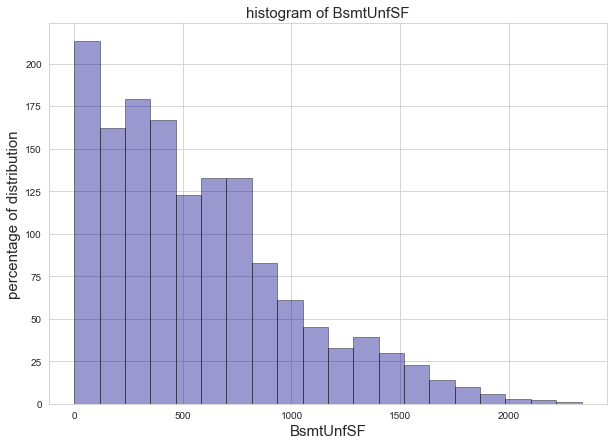

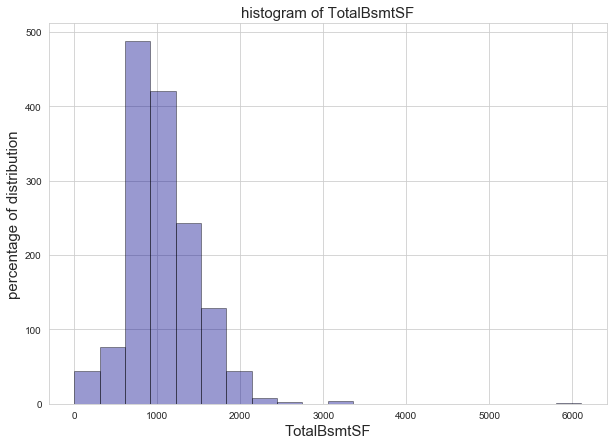

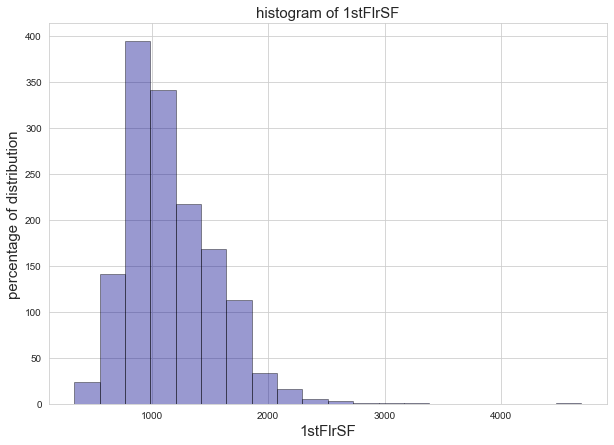

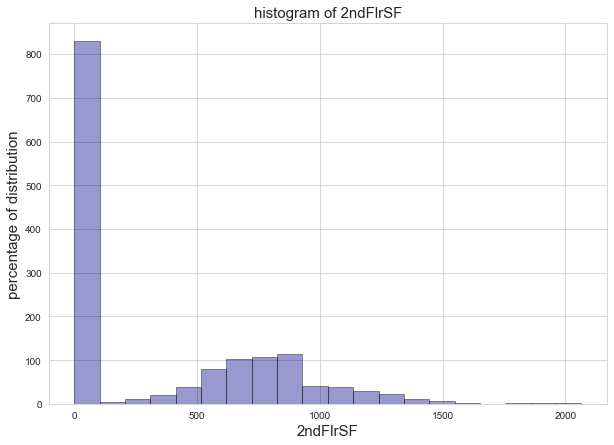

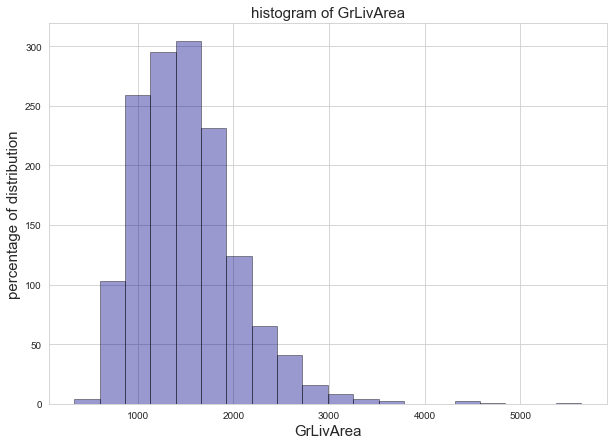

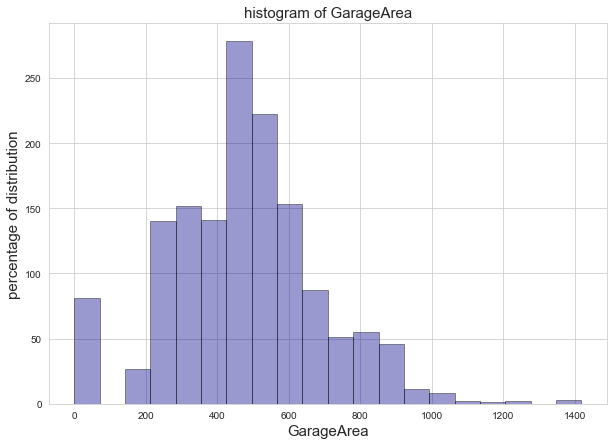

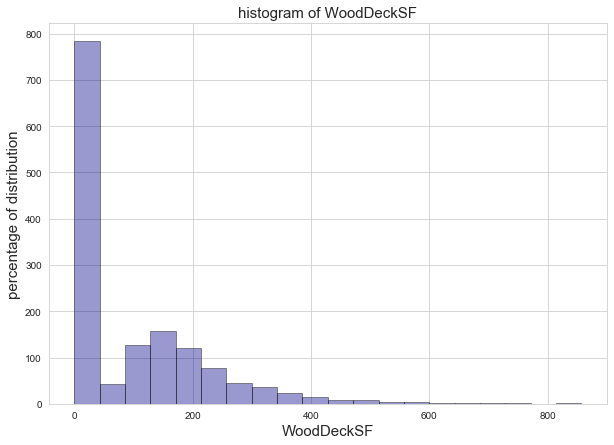

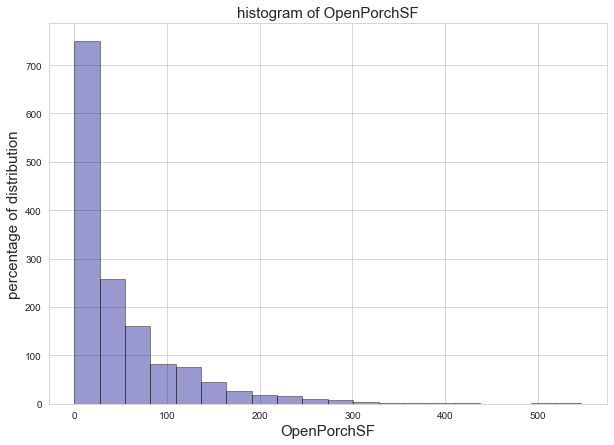

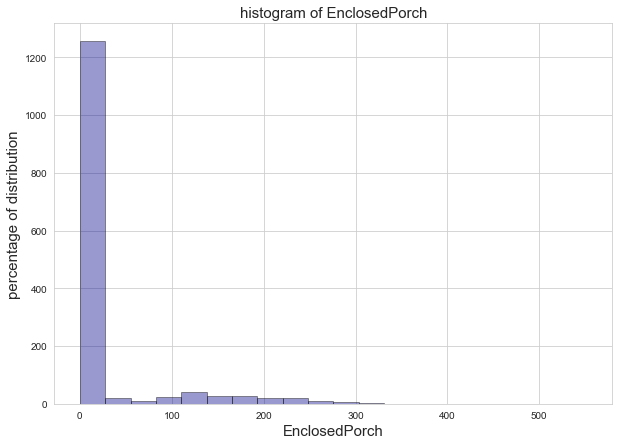

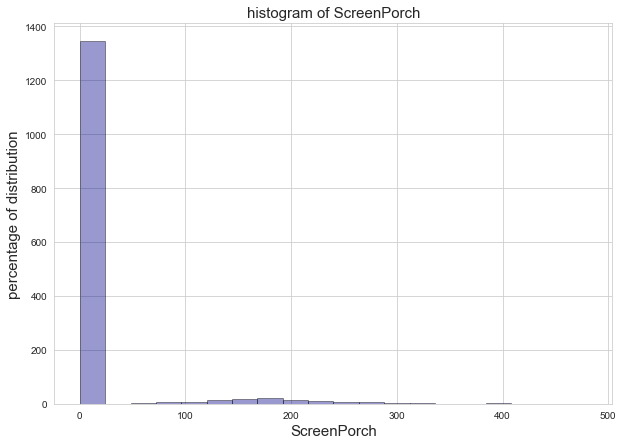

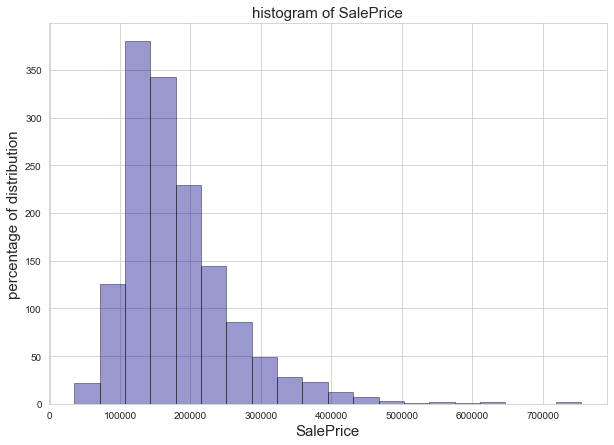

In [23]:
for i in continuous_feature:
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,7))
    sns.distplot(train[i].dropna(),bins=20,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2},kde = False,norm_hist=False,color = 'darkblue',hist=True)
    plt.xlabel(i,size = 15)
    plt.ylabel('percentage of distribution',size = 15)
    plt.title('histogram of '+ i,size = 15)
#     plt.xticks(np.arange(0,10,1))
#     plt.figure(figsize=(12,8))
    plt.show()

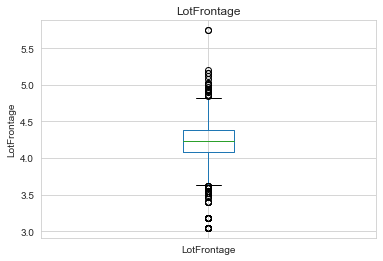

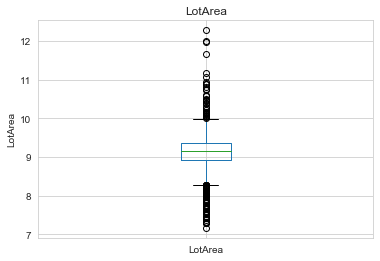

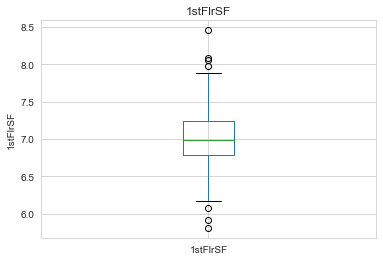

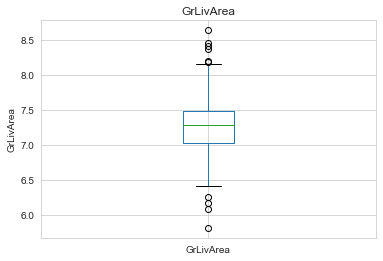

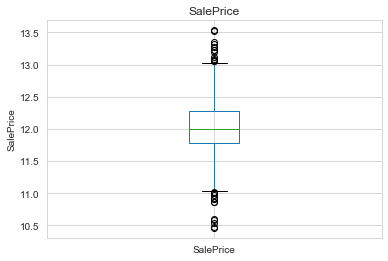

In [24]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

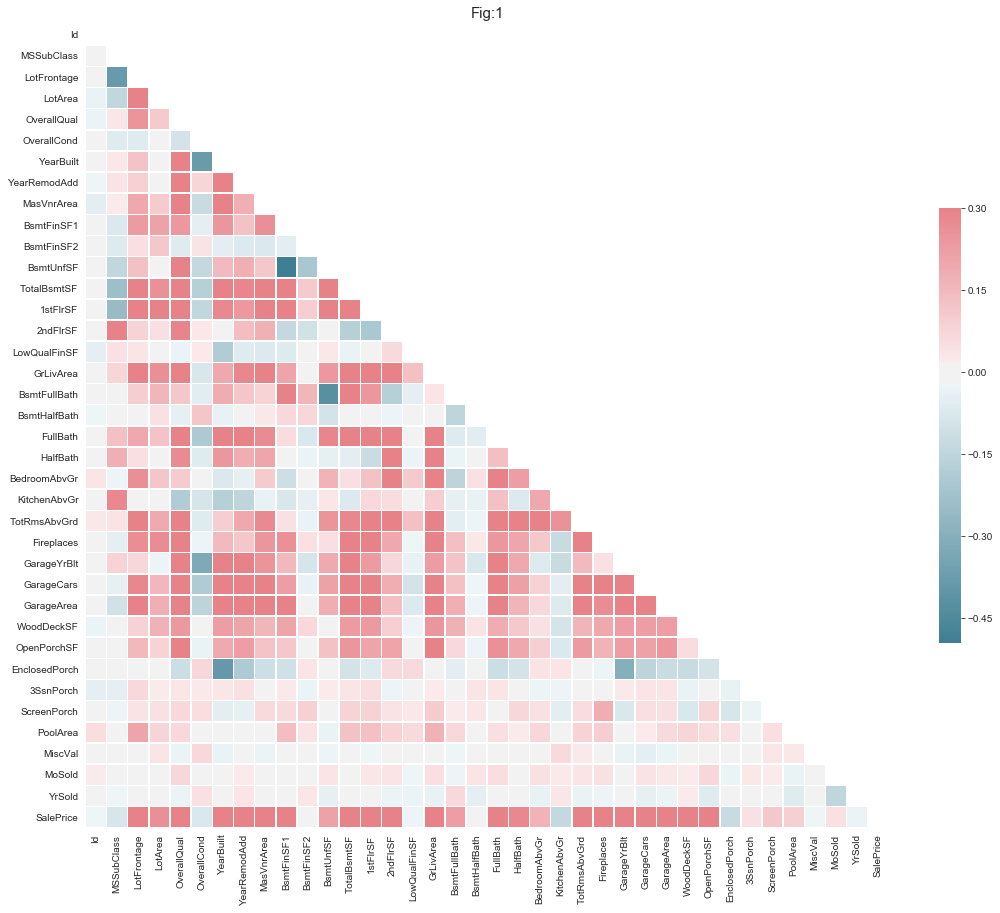

In [25]:

from string import ascii_letters

corr = train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plt.figure(figsize=(18,16))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Fig:1',size=15)
plt.show()

### Most Important features According to me:
- area of the house
- number of floors
- no. of rooms
- size of room
- is there a garage
- presence of suiatable lane
- neighbours
- year sold
- year made
- elactrical system
- number of beadroom
- quality of kitchen

## Bivariate Analysis:

'MSSubClass',--1
 'OverallQual',--1
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',--1
 'HalfBath',--1
 'BedroomAbvGr',--1
 'KitchenAbvGr',--1
 'TotRmsAbvGrd',--1
 'Fireplaces',--1
 'GarageCars',--1
 '3SsnPorch',--2
 'PoolArea',--2
 'MiscVal',--1
 'MoSold'--1

In [26]:
# train['MoSold'].plot(kind='bar',stacked = True)

In [27]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
'''for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.line(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()'''

"for feature in continuous_feature:\n    data=train.copy()\n    if 0 in data[feature].unique():\n        pass\n    else:\n        data[feature]=np.log(data[feature])\n        data['SalePrice']=np.log(data['SalePrice'])\n        plt.line(data[feature],data['SalePrice'])\n        plt.xlabel(feature)\n        plt.ylabel('SalesPrice')\n        plt.title(feature)\n        plt.show()"

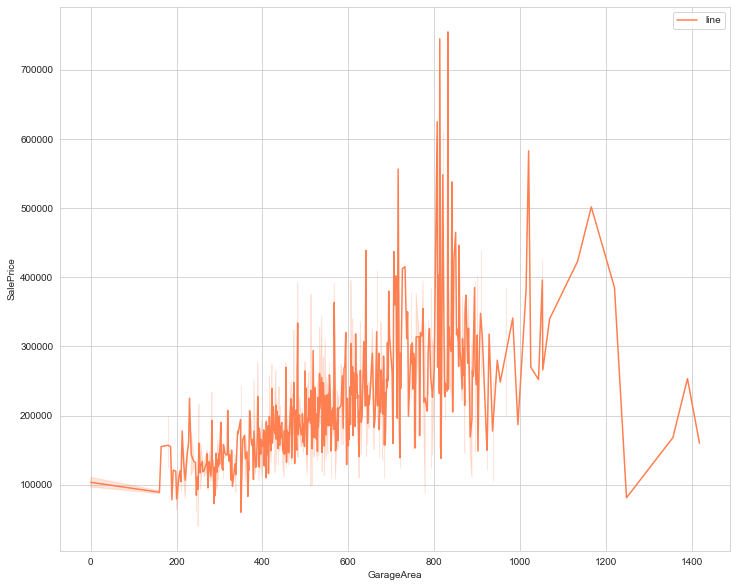

In [29]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(x="GarageArea", y="SalePrice", data=train,color="coral", label="line")
plt.show()

In [30]:
'''from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles = len(train['GarageArea']),output_distribution = 'normal')

## transforming above distributions to Normal distribution ##
X = qt.fit_transform(train['GarageArea'])
# Y = qt.fit_transform(Y)
print('distributions transformed')'''

"from sklearn.preprocessing import QuantileTransformer\nqt = QuantileTransformer(n_quantiles = len(train['GarageArea']),output_distribution = 'normal')\n\n## transforming above distributions to Normal distribution ##\nX = qt.fit_transform(train['GarageArea'])\n# Y = qt.fit_transform(Y)\nprint('distributions transformed')"

In [31]:
'''GarageArea1 = train['GarageArea'].values.reshape(-1,1)
GarageArea2 = train['GarageArea'].values.reshape(1,-1)'''

"GarageArea1 = train['GarageArea'].values.reshape(-1,1)\nGarageArea2 = train['GarageArea'].values.reshape(1,-1)"

In [32]:
'''from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles = len(GarageArea1),output_distribution = 'normal')

## transforming above distributions to Normal distribution ##
train['GarageArea1'] = qt.fit_transform(GarageArea1)
# Y = qt.fit_transform(Y)
print('distributions transformed')'''

"from sklearn.preprocessing import QuantileTransformer\nqt = QuantileTransformer(n_quantiles = len(GarageArea1),output_distribution = 'normal')\n\n## transforming above distributions to Normal distribution ##\ntrain['GarageArea1'] = qt.fit_transform(GarageArea1)\n# Y = qt.fit_transform(Y)\nprint('distributions transformed')"

In [33]:
# from sklearn.preprocessing import QuantileTransformer
# qt1 = QuantileTransformer(n_quantiles = len(GarageArea2),output_distribution = 'normal')

# ## transforming above distributions to Normal distribution ##
# Y = qt1.fit_transform(GarageArea2)
# # Y = qt.fit_transform(Y)
# print('distributions transformed')

In [34]:
# plt.figure(figsize = (10,4), dpi = 120)

# #Plotting transformed exponential
# # plt.subplot(121)
# plt.hist(Y, bins = 100)
# plt.title("transformed 2")

In [35]:
'''plt.figure(figsize = (10,4), dpi = 120)

#Plotting transformed exponential
# plt.subplot(121)
plt.hist(train['GarageArea1'], bins = 100)
plt.title("transformed exponential")'''

'plt.figure(figsize = (10,4), dpi = 120)\n\n#Plotting transformed exponential\n# plt.subplot(121)\nplt.hist(train[\'GarageArea1\'], bins = 100)\nplt.title("transformed exponential")'

In [36]:
# plt.figure(figsize=(12,10))
# ax = sns.lineplot(x="GarageArea1", y="SalePrice", data=train,color="coral", label="line")
# plt.show()

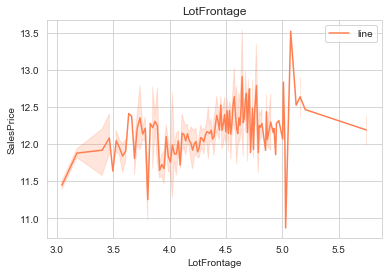

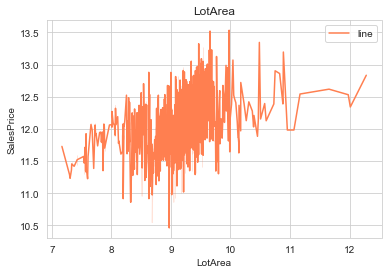

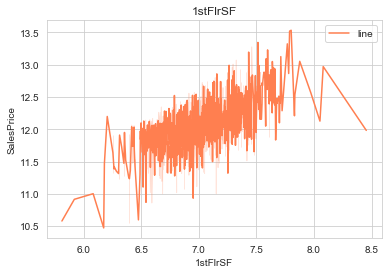

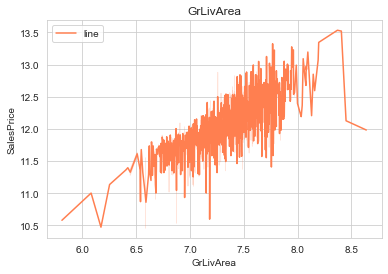

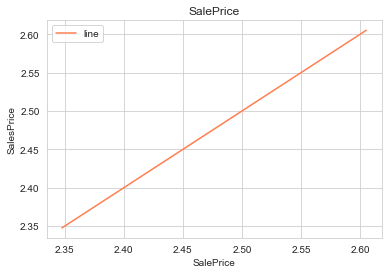

In [37]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        ax1 = sns.lineplot(x=feature, y="SalePrice", data=data,color="coral", label="line")
        #     plt.line(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [38]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

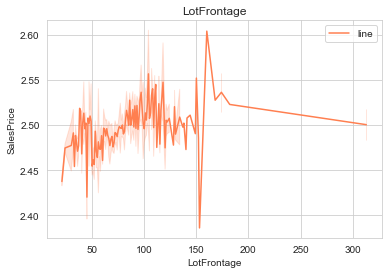

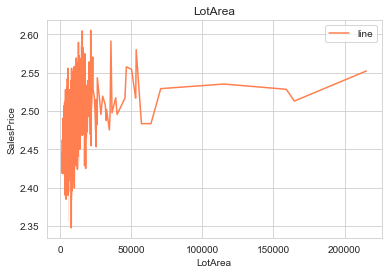

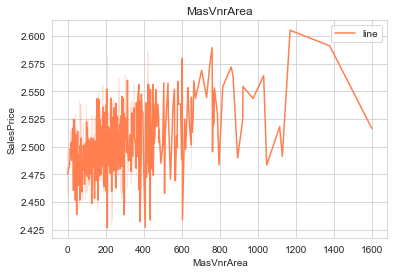

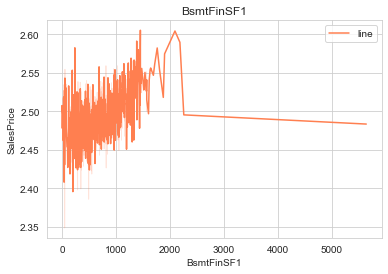

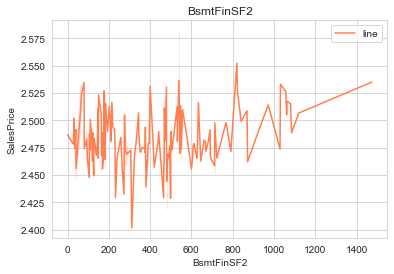

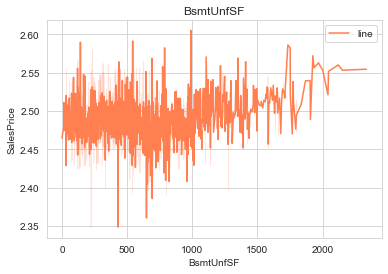

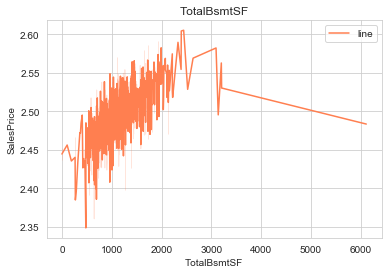

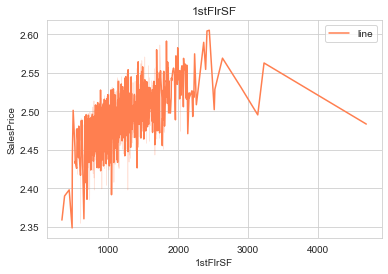

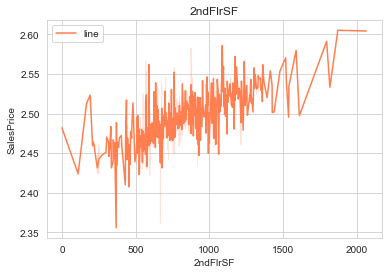

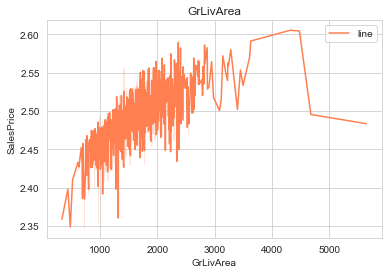

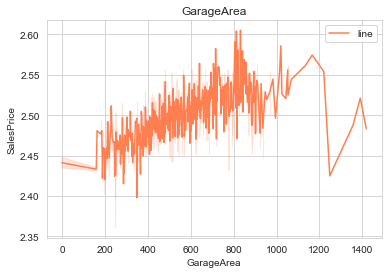

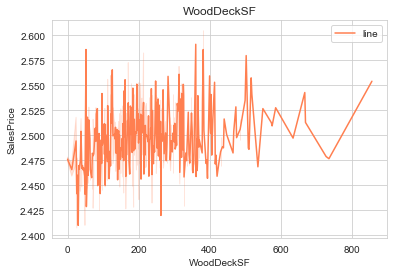

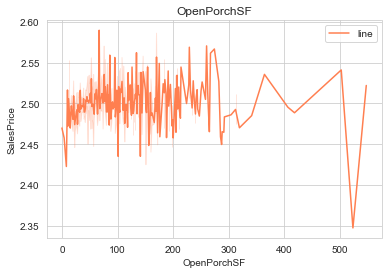

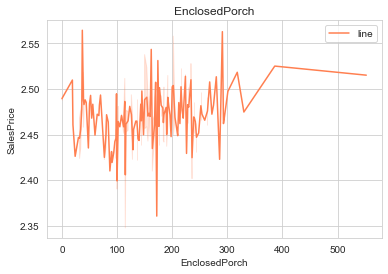

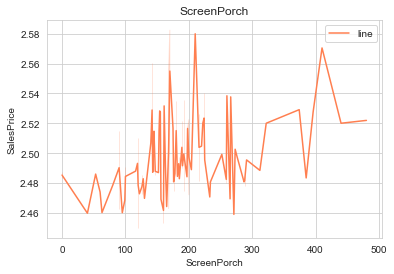

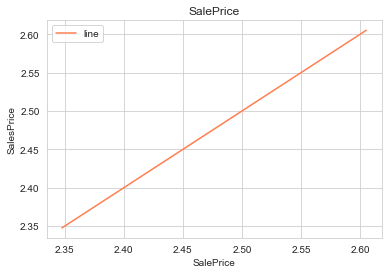

In [39]:
for feature in continuous_feature:
#     data=train.copy()
#     if 0 in data[feature].unique():
#         pass
#     else:
#     data[feature]=np.log(data[feature])
#     data['SalePrice']=np.log(data['SalePrice'])
    ax1 = sns.lineplot(x=feature, y="SalePrice", data=data,color="coral", label="line")
    #     plt.line(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [40]:
# def bar_chart(feature):
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()
#     df = pd.DataFrame([survived,dead])
#     df.index = ['Survived','Dead']
#     df.plot(kind='bar',stacked=True, figsize=(10,5))

In [41]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

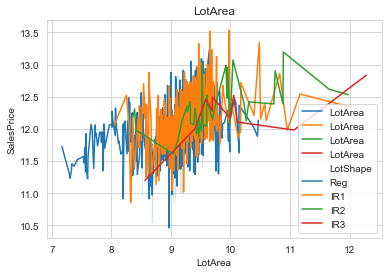

In [42]:
data = train.copy()

data['LotArea']=np.log(data['LotArea'])
data['SalePrice']=np.log(data['SalePrice'])
ax1 = sns.lineplot(x='LotArea', y="SalePrice",hue= 'LotShape', data=data,color="coral", label="LotArea")
#     plt.line(data[feature],data['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalesPrice')
plt.title('LotArea')
plt.legend()
plt.show()



# ax = sns.lineplot(x='LotArea',y='SalePrice',hue= 'LandContour',data = train,color="coral", label="LotArea")


In [43]:
train['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [44]:
def bar_chart(feature):
    Reg = train[train['LotShape']=='Reg'][feature].value_counts()
    IR1 = train[train['LotShape']=='IR1'][feature].value_counts()
    IR2 = train[train['LotShape']=='IR2'][feature].value_counts()
    IR3 = train[train['LotShape']=='IR3'][feature].value_counts()
    
    df = pd.DataFrame([Reg,IR1,IR2,IR3])
    df.index = ['Reg','IR1','IR2','IR3']
    df.plot(kind='bar',stacked=True, figsize=(10,8))

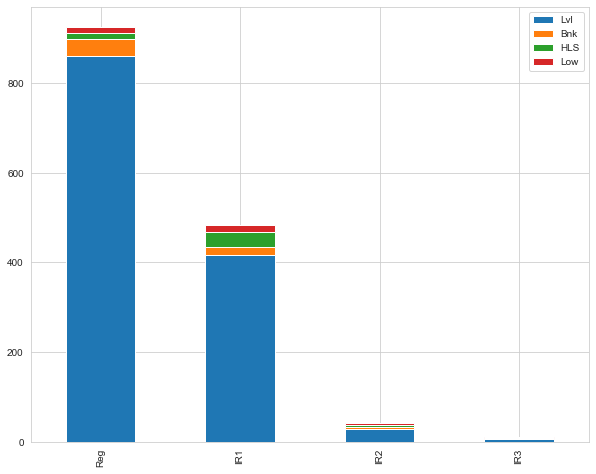

In [45]:
bar_chart('LandContour')


In [46]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
def bar_chart(feature):
    RL = train[train['MSZoning']=='RL'][feature].value_counts()
    RM = train[train['MSZoning']=='RM'][feature].value_counts()
    FV = train[train['MSZoning']=='FV'][feature].value_counts()
    RH = train[train['MSZoning']=='RH'][feature].value_counts()
    C_all = train[train['MSZoning']=='C (all)'][feature].value_counts()
    
    df = pd.DataFrame([RL,RM,FV,RH,C_all])
    df.index = ['RL','RM','FV','RH','C_all']
    df.plot(kind='bar',stacked=True, figsize=(10,8))

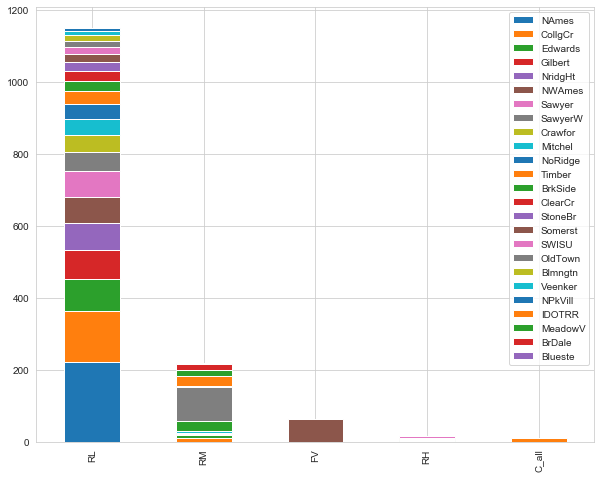

In [48]:
bar_chart('Neighborhood')


In [49]:
import scipy.stats as stats

In [50]:
data=train.copy()
dataset_table=pd.crosstab(data['Neighborhood'],data['MSZoning'])
print(dataset_table)

MSZoning      C (all)  FV  RH   RL  RM
Neighborhood                          
Blmngtn             0   0   0   16   1
Blueste             0   0   0    0   2
BrDale              0   0   0    0  16
BrkSide             0   0   0   28  30
ClearCr             0   0   0   28   0
CollgCr             0   0   0  140  10
Crawfor             0   0   2   46   3
Edwards             0   0   2   90   8
Gilbert             0   0   0   79   0
IDOTRR              9   0   0    0  28
MeadowV             0   0   0    0  17
Mitchel             0   0   0   44   5
NAmes               0   0   2  223   0
NPkVill             0   0   0    9   0
NWAmes              0   0   0   73   0
NoRidge             0   0   0   41   0
NridgHt             0   0   0   76   1
OldTown             1   0   0   17  95
SWISU               0   0   5   20   0
Sawyer              0   0   0   72   2
SawyerW             0   0   5   54   0
Somerst             0  65   0   21   0
StoneBr             0   0   0   25   0
Timber              0   0

In [51]:
dataset_table.values


array([[  0,   0,   0,  16,   1],
       [  0,   0,   0,   0,   2],
       [  0,   0,   0,   0,  16],
       [  0,   0,   0,  28,  30],
       [  0,   0,   0,  28,   0],
       [  0,   0,   0, 140,  10],
       [  0,   0,   2,  46,   3],
       [  0,   0,   2,  90,   8],
       [  0,   0,   0,  79,   0],
       [  9,   0,   0,   0,  28],
       [  0,   0,   0,   0,  17],
       [  0,   0,   0,  44,   5],
       [  0,   0,   2, 223,   0],
       [  0,   0,   0,   9,   0],
       [  0,   0,   0,  73,   0],
       [  0,   0,   0,  41,   0],
       [  0,   0,   0,  76,   1],
       [  1,   0,   0,  17,  95],
       [  0,   0,   5,  20,   0],
       [  0,   0,   0,  72,   2],
       [  0,   0,   5,  54,   0],
       [  0,  65,   0,  21,   0],
       [  0,   0,   0,  25,   0],
       [  0,   0,   0,  38,   0],
       [  0,   0,   0,  11,   0]], dtype=int64)

In [52]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  0   0   0  16   1]
 [  0   0   0   0   2]
 [  0   0   0   0  16]
 [  0   0   0  28  30]
 [  0   0   0  28   0]
 [  0   0   0 140  10]
 [  0   0   2  46   3]
 [  0   0   2  90   8]
 [  0   0   0  79   0]
 [  9   0   0   0  28]
 [  0   0   0   0  17]
 [  0   0   0  44   5]
 [  0   0   2 223   0]
 [  0   0   0   9   0]
 [  0   0   0  73   0]
 [  0   0   0  41   0]
 [  0   0   0  76   1]
 [  1   0   0  17  95]
 [  0   0   5  20   0]
 [  0   0   0  72   2]
 [  0   0   5  54   0]
 [  0  65   0  21   0]
 [  0   0   0  25   0]
 [  0   0   0  38   0]
 [  0   0   0  11   0]]


In [53]:
val=stats.chi2_contingency(dataset_table)


In [54]:
Expected_Values=val[3]


In [55]:
no_of_rows=len(dataset_table.iloc[0:26,0])
no_of_columns=len(dataset_table.iloc[0,0:6])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 96


In [56]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [57]:

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 119.87093929856714


In [58]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  96
p-value: 0.0


In [59]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Neighborhood and MSZoning")
else:
    print("Retain H0,There is no relationship between Neighborhood and MSZoning")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between Neighborhood and MSZoning")
else:
    print("Retain H0,There is no relationship between Neighborhood and MSZoning")

Reject H0,There is a relationship between Neighborhood and MSZoning
Reject H0,There is a relationship between Neighborhood and MSZoning


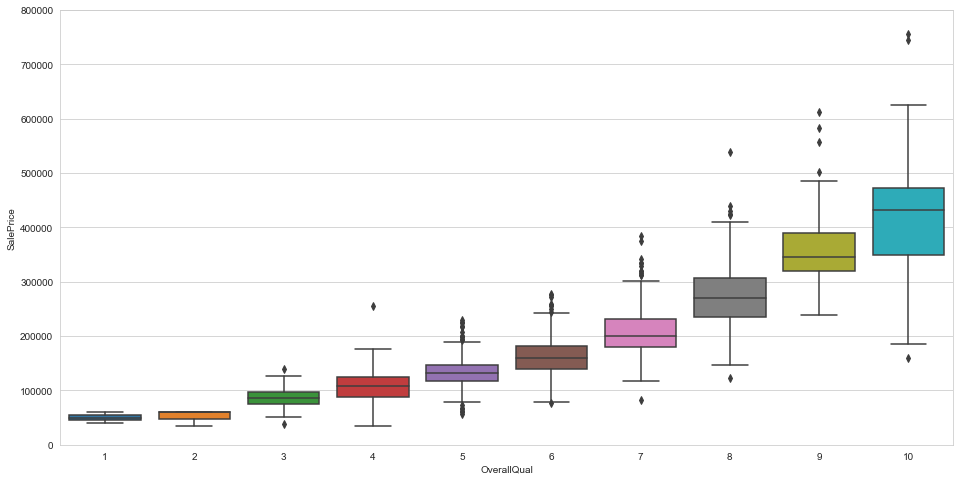

In [60]:
#box plot overallqual/saleprice
var = 'OverallQual'
# data = train.copy
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

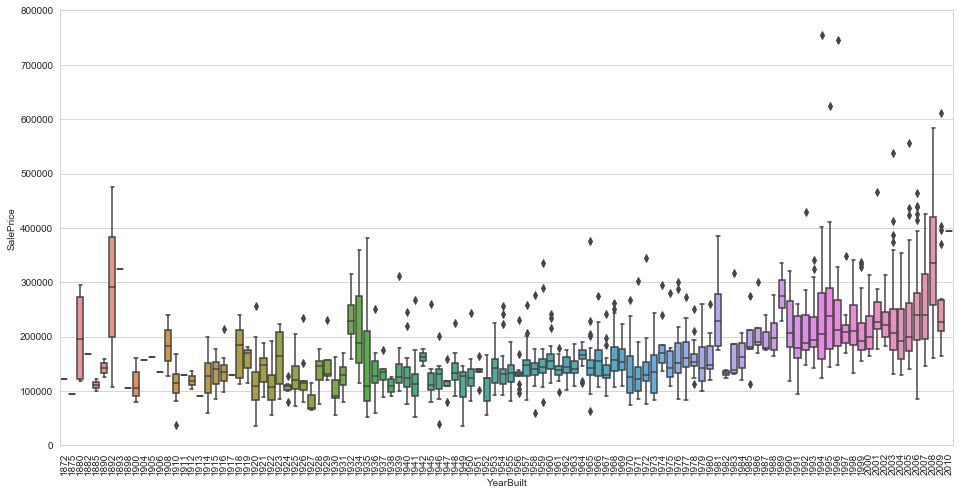

In [61]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

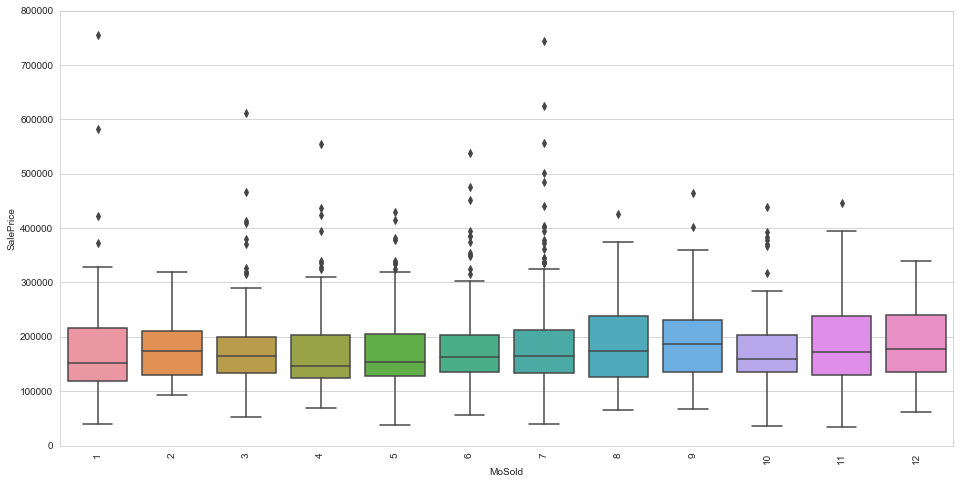

In [62]:
var = 'MoSold'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

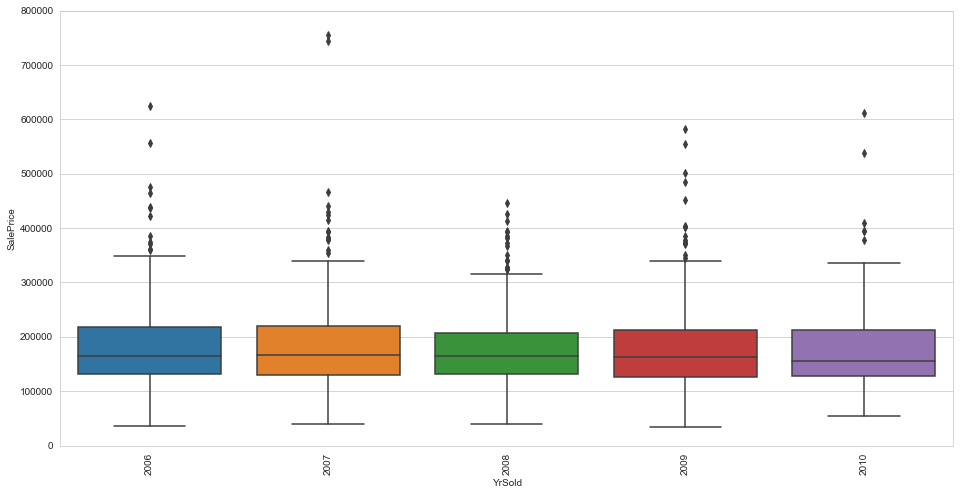

In [63]:
var = 'YrSold'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

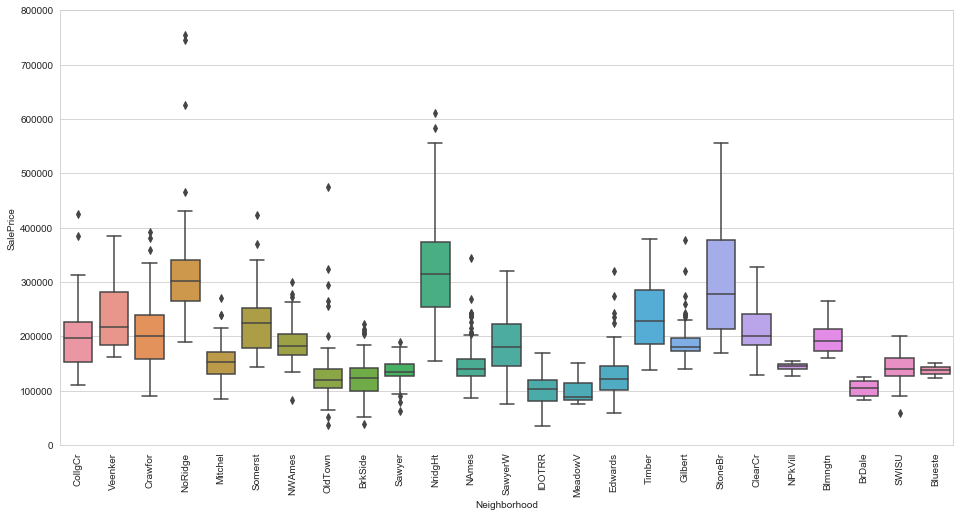

In [64]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

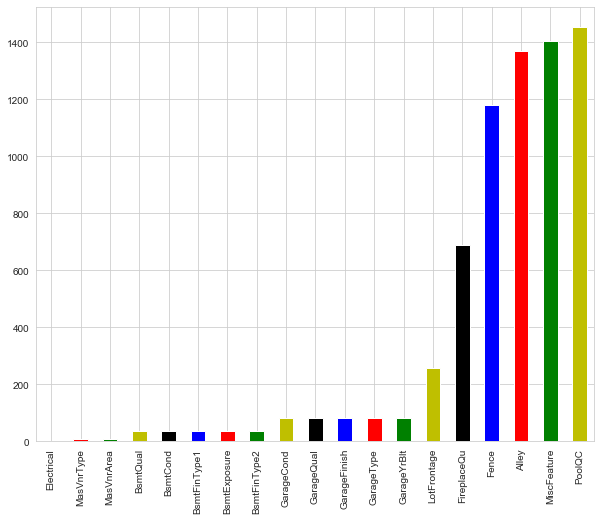

In [65]:
plt.figure(figsize=(10,8))

from itertools import cycle, islice
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
# missing.plot.bar()
# sns.countplot(missing,color="salmon")
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 19))
# my_colors = ['g', 'b']*5
# my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5
# my_colors = [(x/10.0, x/20.0, 0.75) for x in range(0,1)]

missing.plot(kind='bar',color=my_colors)

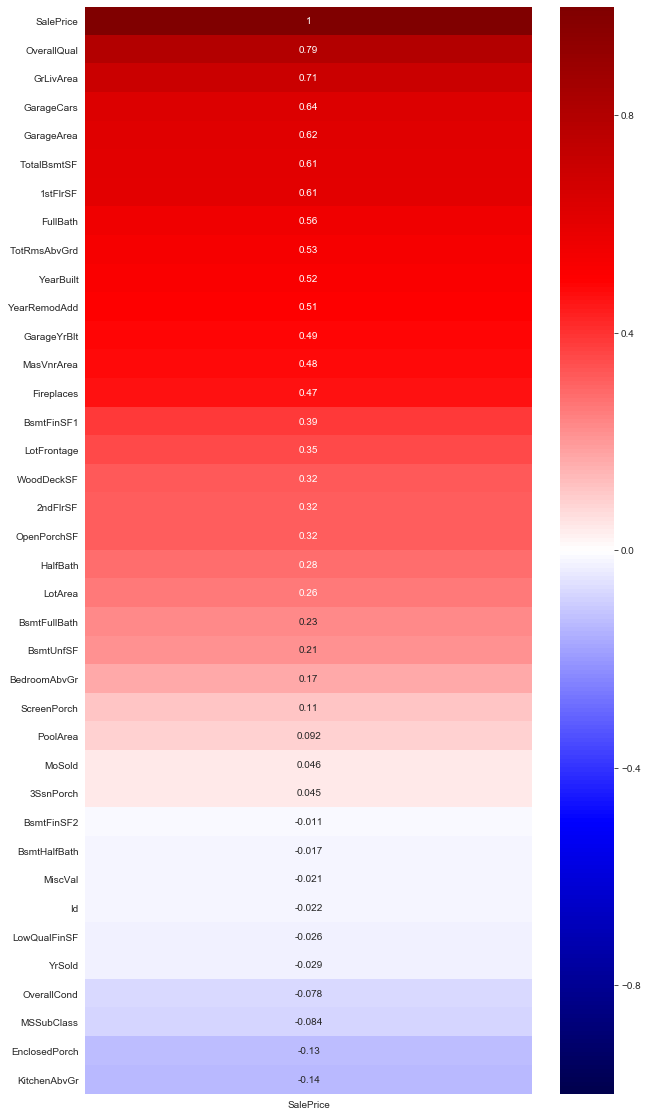

In [66]:
corr_new_train=train.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)

D:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


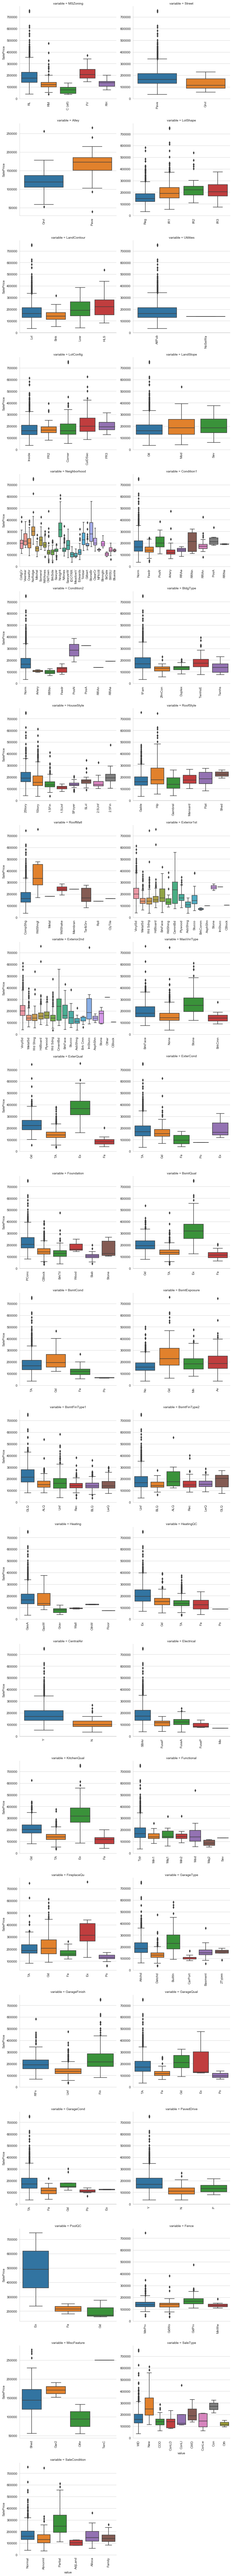

In [67]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

D:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


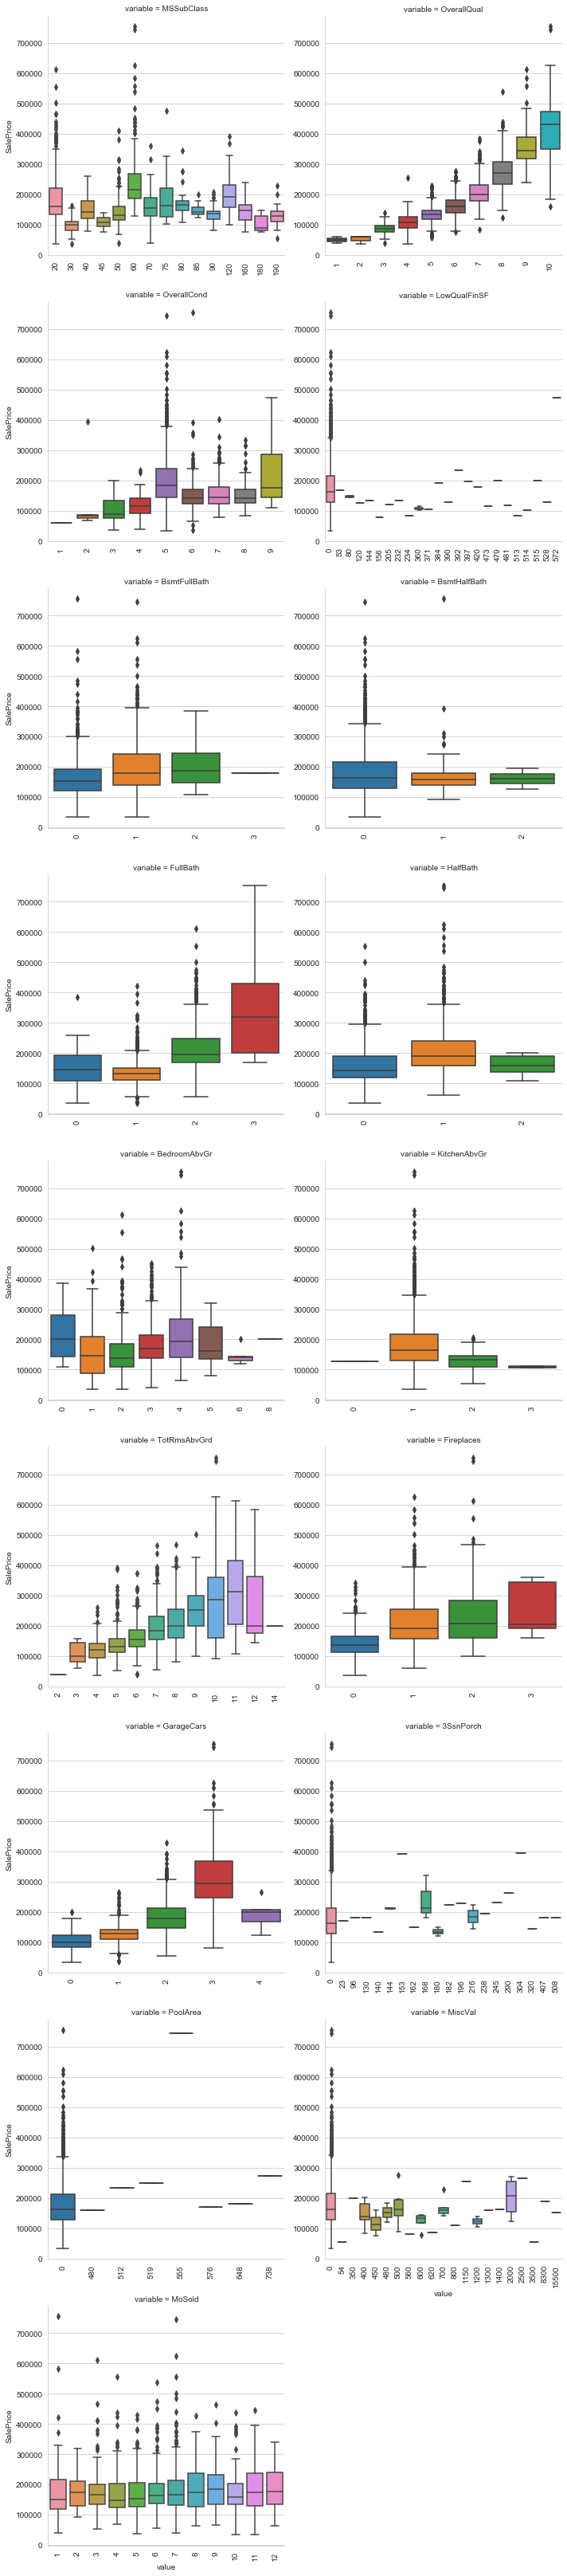

In [68]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=discrete_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [69]:
# f = pd.melt(train, id_vars=['SalePrice'], value_vars=continuous_feature)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
# g = g.map(sns.lineplot, "value", "SalePrice")

In [70]:
train[continuous_feature].shape

(1460, 16)

In [71]:
no_of_rows=len(dataset_table.iloc[0:26,0])
no_of_rows

25

## Feature Engineering:

In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np
SEED = 42

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

import string
import warnings
warnings.filterwarnings('ignore')

In [73]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

# df_train = pd.read_csv('../input/train.csv')
# df_test = pd.read_csv('../input/test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
# print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 81)
Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces

In [74]:
'''
1.HANDEL MISSING VALUE
2.LABEL ENCODING
3.OUTLIER DETECTION AND HANDELING(performing log,sqrt,cbrt)
4.SCALLING(using sklearn ScaleMinMax)


'''

'\n1.HANDEL MISSING VALUE\n2.LABEL ENCODING\n3.OUTLIER DETECTION AND HANDELING(performing log,sqrt,cbrt)\n4.SCALLING(using sklearn ScaleMinMax)\n\n\n'

In [75]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [76]:

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df_train[feature].median()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    df_train[feature].fillna(median_value,inplace=True)
    
df_train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

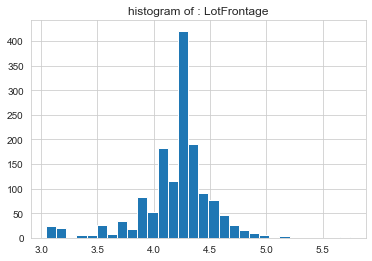

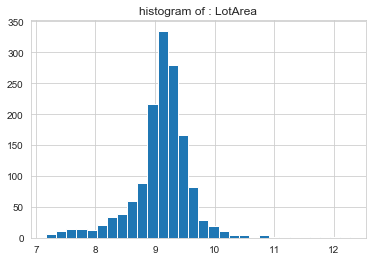

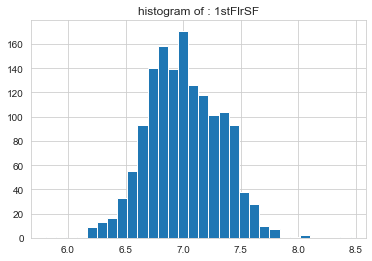

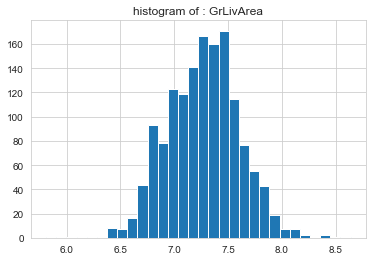

In [77]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    df_train[feature]=np.log(df_train[feature])
    df_train[feature].hist(bins = 30)
    plt.title('histogram of : {}'.format(feature))
    plt.show()
    
    
#########



In [78]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
# with_zero_num = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']
# for i in with_zero_num:
#     df_train[i] = np.sqrt(df_train[i])
#     df_train[i].hist(bins=30)
#     plt.xlabel(i)
#     plt.title(i)
#     plt.show()

### Categorical Data:

In [80]:
features_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']

## Replace missing value with a new label
def replace_cat_feature(df_train,features_nan):
    data=df_train.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df_train=replace_cat_feature(df_train,features_nan)

df_train[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [81]:
for feature in categorical_features:
    temp=df_train.groupby(feature)['SalePrice'].count()/len(df_train)
    temp_df=temp[temp>0.01].index
    df_train[feature]=np.where(df_train[feature].isin(temp_df),df_train[feature],'rear_cat')

In [82]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,rear_cat,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


## Encoding:

In [83]:
cat_fe = [i for i in df_train.columns if df_train[i].dtype=='O']
cat_fe

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in cat_fe:
    df_train[i]=label_encoder.fit_transform(df_train[i])

In [85]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,4.174387,9.041922,0,1,2,3,0,3,0,4,2,0,0,2,7,5,2003,2003,0,0,7,7,1,196.0,1,2,2,2,3,4,2,706,5,0,150,856,0,0,1,2,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,3,0,3,0,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,0,0,2,2008,2,2,208500
1,2,20,2,4.382027,9.169518,0,1,2,3,0,2,0,22,1,0,0,1,6,8,1976,1976,0,0,4,4,2,0.0,2,2,1,2,3,1,0,978,5,0,284,1262,0,0,1,2,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,3,1,5,0,1976.0,2,2,460,2,2,2,298,0,0,0,0,0,0,2,0,0,5,2007,2,2,181500
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,2001,2002,0,0,7,7,1,162.0,1,2,2,2,3,3,2,486,5,0,434,920,0,0,1,2,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,3,1,5,0,2001.0,2,2,608,2,2,2,0,42,0,0,0,0,0,2,0,0,9,2008,2,2,223500
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,1915,1970,0,0,8,9,2,0.0,2,2,0,4,1,4,0,216,5,0,540,756,0,2,1,2,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,3,1,2,3,1998.0,3,3,642,2,2,2,0,35,272,0,0,0,0,2,0,0,2,2006,2,0,140000
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,2000,2000,0,0,7,7,1,350.0,1,2,2,2,3,0,2,655,5,0,490,1145,0,0,1,2,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,3,1,5,0,2000.0,2,3,836,2,2,2,192,84,0,0,0,0,0,2,0,0,12,2008,2,2,250000


### Feature Scalling:

In [86]:
feature_scale=[feature for feature in df_train.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [87]:
scaler.transform(df_train[feature_scale])

array([[0.23529412, 0.5       , 0.41820812, ..., 0.5       , 0.66666667,
        0.5       ],
       [0.        , 0.5       , 0.49506375, ..., 0.25      , 0.66666667,
        0.5       ],
       [0.23529412, 0.5       , 0.434909  , ..., 0.5       , 0.66666667,
        0.5       ],
       ...,
       [0.29411765, 0.5       , 0.42385922, ..., 1.        , 0.66666667,
        0.5       ],
       [0.        , 0.5       , 0.434909  , ..., 1.        , 0.66666667,
        0.5       ],
       [0.        , 0.5       , 0.47117546, ..., 0.5       , 0.66666667,
        0.5       ]])

In [88]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [89]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,208500,0.235294,0.5,0.418208,0.366344,0.0,0.5,0.666667,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.949275,0.883333,0.0,0.0,0.7,0.7,0.25,0.12250,0.333333,0.666667,0.50,0.5,0.75,1.00,0.333333,0.125089,0.833333,0.0,0.064212,0.140098,0.0,0.0,1.0,0.666667,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,0.75,0.000000,0.6,0.0,0.936364,0.666667,0.50,0.386460,0.666667,0.666667,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,0.666667,0.5
1,2,181500,0.000000,0.5,0.495064,0.391317,0.0,0.5,0.666667,1.0,0.0,0.50,0.0,1.000000,0.2,0.0,0.0,0.2,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.4,0.4,0.50,0.00000,0.666667,0.666667,0.25,0.5,0.75,0.25,0.000000,0.173281,0.833333,0.0,0.121575,0.206547,0.0,0.0,1.0,0.666667,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,0.75,0.333333,1.0,0.0,0.690909,0.666667,0.50,0.324401,0.666667,0.666667,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,0.666667,0.5
2,3,223500,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.000000,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.934783,0.866667,0.0,0.0,0.7,0.7,0.25,0.10125,0.333333,0.666667,0.50,0.5,0.75,0.75,0.333333,0.086109,0.833333,0.0,0.185788,0.150573,0.0,0.0,1.0,0.666667,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,0.75,0.333333,1.0,0.0,0.918182,0.666667,0.50,0.428773,0.666667,0.666667,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,0.666667,0.5
3,4,140000,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.000000,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.8,0.9,0.50,0.00000,0.666667,0.666667,0.00,1.0,0.25,1.00,0.000000,0.038271,0.833333,0.0,0.231164,0.123732,0.0,0.5,1.0,0.666667,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,0.75,0.333333,0.4,0.6,0.890909,1.000000,0.75,0.452750,0.666667,0.666667,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,0.666667,0.0
4,5,250000,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.000000,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.927536,0.833333,0.0,0.0,0.7,0.7,0.25,0.21875,0.333333,0.666667,0.50,0.5,0.75,0.00,0.333333,0.116052,0.833333,0.0,0.209760,0.187398,0.0,0.0,1.0,0.666667,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,0.75,0.333333,1.0,0.0,0.909091,0.666667,0.75,0.589563,0.666667,0.666667,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,0.666667,0.5


In [90]:
# data.to_csv('Data_After_FE.csv')

so feature engineering is done

## train test split:

In [91]:
data1 = data.copy() 

Y_train = data1['SalePrice']
X_train = data1.drop(['SalePrice'],axis=1)
# Y_train = data1['SalePrice']

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=SEED)

## Evaluation:

In [93]:
# from sklearn.matrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def validation(y_val,y_pred):
    rmse_val = sqrt(mean_squared_error(y_val,y_pred)) 
    return rmse_val


## Model Building:

In [94]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)

In [95]:
validation(y_val,y_pred)

47144.44885038382

# Test DataSet:

In [96]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [97]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [98]:
numerical_with_nan_test=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']
for feature in numerical_with_nan_test:
    print("{}: {}% missing value".format(feature,np.around(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.0% missing value
MasVnrArea: 0.0% missing value
BsmtFullBath: 0.0% missing value
BsmtHalfBath: 0.0% missing value
GarageYrBlt: 0.0% missing value


In [99]:
for feature in numerical_with_nan_test:
    ## We will replace by using median since there are outliers
    median_value_test=df_test[feature].median()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    df_test[feature].fillna(median_value_test,inplace=True)
    
df_test[numerical_with_nan_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [100]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    df_test[feature]=np.log(df_test[feature])

## Test Categorical Data:

In [101]:
features_nan_test=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']

## Replace missing value with a new label
def replace_cat_feature(df_test,features_nan_test):
#     data_test=df_test.copy()
    df_test[features_nan_test]=df_test[features_nan_test].fillna('Missing')
    return df_test

df_test=replace_cat_feature(df_test,features_nan_test)

# df_test[features_nan_test].isnull().sum()

In [102]:
categorical_var_test = [i for i in df_test.columns if df_test[i].dtype == 'O' ]
len(categorical_var_test)

43

In [103]:
# for feature in categorical_var_test:
#     temp=df_test.groupby(feature)['SalePrice'].count()/len(df_train)
#     temp_df=temp[temp>0.01].index
#     df_train[feature]=np.where(df_train[feature].isin(temp_df),df_train[feature],'rear_cat')

In [104]:
numerical_features_test = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']
year_feature_test = [feature for feature in numerical_features_test if 'Yr' in feature or 'Year' in feature]
discrete_feature_test=[feature for feature in numerical_features_test if len(df_test[feature].unique())<25 and feature not in year_feature_test+['Id']]
continuous_feature_test=[feature for feature in numerical_features_test if feature not in discrete_feature_test+year_feature_test+['Id']]


In [105]:
len(numerical_features_test)

37

In [106]:
year_feature_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [107]:
len(discrete_feature_test)

16

In [108]:
continuous_feature_test

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

In [109]:
df_test.KitchenQual.dtype

dtype('O')

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null float64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 n

In [111]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [112]:
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])




In [113]:
con_feature = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea','GarageCars']





for feature in con_feature:
    ## We will replace by using median since there are outliers
    median_value_con=df_test[feature].median()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    df_test[feature].fillna(median_value_con,inplace=True)
    
# df_test[numerical_with_nan_test].isnull().sum()

In [114]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [115]:
# categorical_var_test=['Exterior1st',
#  'Exterior2nd',
#  'MasVnrType',
#  'ExterQual',
#  'ExterCond',
#  'Foundation',
#  'BsmtQual',
#  'BsmtCond',
#  'BsmtExposure',
#  'BsmtFinType1',
#  'BsmtFinType2',
#  'Heating',
#  'HeatingQC',
#  'CentralAir',
#  'Electrical',
#  'KitchenQual',
#  'Functional',
#  'FireplaceQu',
#  'GarageType',
#  'GarageFinish',
#  'GarageQual',
#  'GarageCond',
#  'PavedDrive',
#  'PoolQC',
#  'Fence',
#  'MiscFeature',
#  'SaleType',
#  'SaleCondition',]

In [116]:
from sklearn.preprocessing import LabelEncoder
label_encod = LabelEncoder()

for i in categorical_var_test:
    df_test[i]=label_encod.fit_transform(df_test[i])

In [117]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,3,5,7,0,3,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,8,4
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,8,4
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,3,6,7,1,5,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,8,4
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,8,4
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,8,4


In [118]:
feature_scale_test=[feature for feature in df_test.columns if feature not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler_test=MinMaxScaler()
scaler_test.fit(df_test[feature_scale_test])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [119]:
scaler_test.transform(df_test[feature_scale_test])

array([[0.        , 0.6       , 0.59344538, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.8       , 0.59895721, ..., 1.        , 1.        ,
        0.8       ],
       [0.23529412, 0.8       , 0.55885415, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.8       , 0.90099208, ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.8       , 0.48035069, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.8       , 0.55885415, ..., 0.        , 1.        ,
        0.8       ]])

In [120]:
# transform the train and test set, and add on the Id and SalePrice variables
data_test = pd.concat([df_test[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler_test.transform(df_test[feature_scale_test]), columns=feature_scale_test)],
                    axis=1)

In [121]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.625954,0.183333,0.2,0.0,0.833333,0.857143,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.000000,0.166667,1.0,0.00,0.6,0.166667,0.211538,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.603053,0.133333,0.6,0.0,0.916667,0.928571,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.666667,0.250000,1.0,0.00,0.6,0.166667,0.201923,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.900763,0.800000,0.2,0.0,0.833333,0.857143,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.000000,0.250000,1.0,0.25,1.0,0.166667,0.326923,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.908397,0.800000,0.2,0.0,0.833333,0.857143,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.666667,0.333333,1.0,0.25,0.4,0.166667,0.330128,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.862595,0.700000,0.2,0.0,0.500000,0.428571,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.666667,0.166667,1.0,0.00,0.6,0.166667,0.310897,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8


# Feature Selection:

### 1. Feature Selection Using Linear Regression

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso,LinearRegression

# select_from_model = SelectFromModel(Lasso(alpha = 0.005,random_state = SEED))
select_from_model = SelectFromModel(LinearRegression())

select_from_model.fit(X_train,Y_train)


SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [123]:
select_from_model.get_support().sum()

14

In [124]:
selected_features = X_train.columns[(select_from_model.get_support())]
selected_features

Index(['LotArea', 'Utilities', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'PoolQC'],
      dtype='object')

In [125]:
X_train_fs_linear_regression = X_train[selected_features]

In [126]:
X_train_fs_linear_regression.head()

,LotArea,Utilities,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PoolArea,PoolQC
0,0.366344,0.0,0.666667,0.12250,0.125089,0.140098,0.356155,0.413559,0.577712,0.375,0.333333,0.500000,0.0,0.0
1,0.391317,0.0,0.555556,0.00000,0.173281,0.206547,0.503056,0.000000,0.470245,0.375,0.333333,0.333333,0.0,0.0
2,0.422359,0.0,0.666667,0.10125,0.086109,0.150573,0.383441,0.419370,0.593095,0.375,0.333333,0.333333,0.0,0.0
3,0.390295,0.0,0.666667,0.00000,0.038271,0.123732,0.399941,0.366102,0.579157,0.375,0.333333,0.416667,0.0,0.0
4,0.468761,0.0,0.777778,0.21875,0.116052,0.187398,0.466237,0.509927,0.666523,0.500,0.333333,0.583333,0.0,0.0


In [127]:
x_train_fs_linear_regression, x_val_fs_linear_regression, y_train_fs_linear_regression, y_val_fs_linear_regression=train_test_split(X_train_fs_linear_regression,Y_train,test_size = 0.33,random_state = SEED)

In [128]:
print(x_train_fs_linear_regression.shape, x_val_fs_linear_regression.shape, y_train_fs_linear_regression.shape, y_val_fs_linear_regression.shape)

(978, 14) (482, 14) (978,) (482,)


In [169]:
x_train_fs_linear_regression.head()

,LotArea,Utilities,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PoolArea,PoolQC
615,0.374287,0.0,0.555556,0.0975,0.135188,0.153191,0.434898,0.0,0.406532,0.375,0.333333,0.333333,0.0,0.0
613,0.365229,0.0,0.444444,0.0000,0.036499,0.183306,0.457883,0.0,0.428018,0.375,0.333333,0.333333,0.0,0.0
1303,0.371780,0.0,0.666667,0.1425,0.000000,0.264484,0.596626,0.0,0.557711,0.375,0.333333,0.416667,0.0,0.0
486,0.404882,0.0,0.444444,0.1050,0.148122,0.175614,0.441659,0.0,0.412852,0.375,0.333333,0.333333,0.0,0.0
561,0.399502,0.0,0.444444,0.0000,0.189759,0.227332,0.539343,0.0,0.504164,0.250,0.333333,0.333333,0.0,0.0


## Model Building:

### Ridge:

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(x_train_fs_linear_regression,y_train_fs_linear_regression)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [204]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train_fs_linear_regression,y_train_fs_linear_regression)
y_pred_train=ridge_mod.predict(x_train_fs_linear_regression)
y_pred_val=ridge_mod.predict(x_val_fs_linear_regression)

y_pred_train_series = pd.Series(np.log(y_pred_train))
y_pred_train_series_median = y_pred_train_series.median()
y_pred_train_series_1=y_pred_train_series.fillna(y_pred_train_series_median)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(np.log(y_train_fs_linear_regression), y_pred_train_series_1))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(np.log(y_val_fs_linear_regression), np.log(y_pred_val))))) 

Root Mean Square Error train = 0.1993366609145545
Root Mean Square Error test = 0.2186141668158025


In [213]:
# np.sqrt(mean_squared_error(np.log(y_val_fs_linear_regression), np.log(y_pred_val)))

In [205]:
# np.log(y_train_fs_linear_regression)

In [206]:
# y_pred_train_series = pd.Series(np.log(y_pred_train))
# y_pred_train_series.isnull().sum()

In [207]:
# y_pred_train_series_median = y_pred_train_series.median()
# y_pred_train_series_1=y_pred_train_series.fillna(y_pred_train_series_median)

In [208]:
# np.log(y_pred_train_series_1)

In [209]:
# mean_squared_error(np.log(y_train_fs_linear_regression),y_pred_train_series_1)

In [211]:
# y_val_fs_linear_regression

In [212]:
# y_pred_val

In [210]:
# data_test_fs1 = data_test[selected_features]
# data_test_fs1.head()

In [135]:
# y_pred_fs1_test = ridge_mod.predict(data_test)


In [136]:
y_pred_fs1_test = ridge_mod.predict(data_test_fs1)
pred_fs1 = pd.DataFrame(y_pred_fs1_test)
sub_df = pd.read_csv('sample_submission.csv')
datasets_fs1 = pd.concat([sub_df['Id'],pred_fs1],axis = 1)
datasets_fs1.columns=['Id','SalePrice']
datasets_fs1.to_csv('submission_fs1.csv',index=False)


In [137]:
datasets_fs1.head()

,Id,SalePrice
0,1461,16619.309237
1,1462,83370.265688
2,1463,54422.727620
3,1464,72151.763593
4,1465,92814.941192


## Random Forest: Best One(Without Feature Engineering)

In [165]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(x_train, y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(x_train)
y_pred_val = best_estimator.predict(x_val)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(np.log(y_train), np.log(y_pred_train)))))
print('Root Mean Square Error val = ' + str(np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred_val)))))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Root Mean Square Error train = 0.06637476417976582
Root Mean Square Error val = 0.14867231107512996


In [139]:
y_pred_val

array([140692.06281373, 304945.1       , 117838.85416667, 174597.77777778,
       333109.76666667,  81593.33333333, 201171.66666667, 150539.58333333,
        83376.66666667, 128095.88888889, 157291.66666667, 120413.77777778,
       106746.66666667, 206209.72511671, 180731.65079365, 127842.4303351 ,
       194372.85714286, 142699.06281373, 111790.52083333, 201698.87777778,
       163135.16666667, 232081.36666667, 176135.71031746, 122918.82716049,
       203049.5       , 167545.14391534, 183812.51960784, 105825.83333333,
       177523.10381122, 194727.26666667, 125487.77777778, 244410.8015873 ,
       184865.23333333, 115198.82716049, 258716.26666667, 143210.39938272,
       129966.66666667, 203144.97619048, 297980.        , 118147.77777778,
       126336.66666667, 236021.67777778, 122706.04993386, 374510.36666667,
       136133.42692308, 138487.98611111, 118439.24305556, 130587.48737374,
       356615.43333333, 145760.06944444, 120689.65873016, 203741.66666667,
       124043.83333333, 3

In [140]:
y_val

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
184     127000
554     284000
1173    200500
76      135750
906     255000
674     140000
1398    138000
374     219500
1032    310000
259      97000
51      114500
244     205000
1101    119500
581     253293
679     128500
1132    117500
1220    115000
49      127000
591     451950
1269    144000
1249    119000
1138    196000
490     115000
1024    287000
811     144500
141     260000
846     213000
925     175000
772     107000
532     107500
29       68500
1299    154000
65      317000
765     264132
1347    283463
175     243000
394     10

In [214]:
y_pred_rf_test = best_estimator.predict(data_test)
pred_rf = pd.DataFrame(y_pred_rf_test)
sub_df = pd.read_csv('sample_submission.csv')
datasets_rf = pd.concat([sub_df['Id'],pred_rf],axis = 1)
datasets_rf.columns=['Id','SalePrice']
datasets_rf.to_csv('submission_rf.csv',index=False)


In [215]:
datasets_rf.head()

,Id,SalePrice
0,1461,131370.555556
1,1462,144830.000000
2,1463,184533.333333
3,1464,187204.000000
4,1465,204613.733333


## Xgboost:

In [143]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost 

In [144]:
# params = {
#     'learning_rate'   :[0.05,0.10,0.15,0.20,0.25,0.30],
#     'max_depth'       :[3,5,6,7,8,11,12,15],
#     'min_child_weight':[1,3,5,7],
#     'gamma'           :[0.0,0.1,0.2,0.3,0.4],
#     'colsample_bytree':[0.3,0.4,0.5,0.7]  
# }
params={'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

In [145]:
regressor = xgboost.XGBRegressor()

In [146]:
# random_search = RandomizedSearchCV(regressor,param_distributions = params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search = RandomizedSearchCV(regressor, params,n_iter=5, n_jobs=1, cv=5)

In [147]:
random_search.fit(x_train,y_train)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                          tree_method=None,
                                          validate_parameters=False,
                                          verbosity=None),
                   iid='warn', n_iter=5, n_jo

In [148]:
random_search.best_estimator_


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9, tree_method=None,
             validate_parameters=False, verbosity=None)

In [149]:
xgbo = xgboost.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=5, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
             validate_parameters=False, verbosity=None)

In [167]:
xgbo.fit(x_train,y_train)
y_pred = xgbo.predict(x_val)
mse = mean_squared_error(np.log(y_val),np.log(y_pred))
print(np.sqrt(mse))

0.15146253486514355


In [151]:
y_pred

array([141546.   , 355895.84 , 109823.98 , 163452.62 , 306966.03 ,
        74356.45 , 233644.77 , 150189.72 ,  77308.42 , 135310.84 ,
       148044.8  , 119283.89 , 119247.76 , 205425.3  , 156927.81 ,
       134959.36 , 202176.53 , 126425.305, 128594.04 , 219673.42 ,
       137100.19 , 186881.22 , 167374.7  , 125886.82 , 206514.88 ,
       175600.52 , 212796.03 , 108431.516, 166791.67 , 204724.22 ,
       141357.6  , 258358.02 , 198164.2  , 109474.37 , 254227.06 ,
       148807.   , 125171.57 , 213244.27 , 306847.06 , 125024.92 ,
       133626.97 , 247411.16 , 118824.89 , 408182.06 , 130660.9  ,
       135038.05 , 108776.016, 116745.81 , 362320.3  , 144265.89 ,
       113347.76 , 185605.86 , 103041.125, 379293.06 , 146584.14 ,
       246367.03 , 209262.38 , 139041.98 , 142169.92 , 114544.69 ,
        51130.41 , 181673.1  , 297529.47 , 268655.94 , 314982.   ,
       230603.08 ,  96356.98 , 340691.44 , 113895.85 , 162004.23 ,
       138295.7  , 124748.62 , 106975.24 ,  86406.65 , 508520.

In [152]:
y_val

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
184     127000
554     284000
1173    200500
76      135750
906     255000
674     140000
1398    138000
374     219500
1032    310000
259      97000
51      114500
244     205000
1101    119500
581     253293
679     128500
1132    117500
1220    115000
49      127000
591     451950
1269    144000
1249    119000
1138    196000
490     115000
1024    287000
811     144500
141     260000
846     213000
925     175000
772     107000
532     107500
29       68500
1299    154000
65      317000
765     264132
1347    283463
175     243000
394     10

In [153]:
y_pred_test = xgbo.predict(data_test)

In [154]:
pred = pd.DataFrame(y_pred_test)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis = 1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission2.csv',index=False)



In [155]:
datasets.head()

,Id,SalePrice
0,1461,127409.898438
1,1462,165546.015625
2,1463,163151.343750
3,1464,195880.468750
4,1465,212505.984375


In [158]:
# regressor=xgboost.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
#              min_child_weight=5, monotone_constraints=None,
#              n_estimators=100, num_parallel_tree=1,
#              objective='reg:squarederror', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
#              validate_parameters=False, verbosity=None)
# #min_child_weight=5, missing=nan,

In [160]:
# best_x = xgbr_reg.best_estimator_
# y_train_pred_x = best_x.predict(X_train)
# y_val_pred_x = best_x.predict(X_test)

In [ ]:
# pred = pd.DataFrame(preds)
# sub_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
# datasets = pd.concat([sub_df['Id'],pred],axis = 1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('submission.csv',index=False)



In [ ]:
# data_test.to_csv('test_data_after_FE.csv')

In [ ]:
# !pip install xgboost

In [ ]:
# import xgboost as xgb
# xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
# xgb_reg.fit(X_train,y_train)


In [ ]:
# y_predxgb = xgb_reg.predict(X_val)

In [ ]:
# from sklearn.matrics import mean_squared_error
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# def validation(y_val,y_pred):
#root_mean_squared_error = sqrt(mean_squared_error(y_val,y_pred)) 
#     return rmse_val
#validation(y_val,y_predxgb)


In [ ]:
# preds = xgb_reg.predict(data_test)

## Neural Network:

In [ ]:
# from keras import backend as K
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
# y_train.shape

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout


# # Initialising the ANN
# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 80))

# # Adding the second hidden layer
# classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# # Adding the third hidden layer
# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# # Adding the output layer
# classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# # Compiling the ANN
# classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# # Fitting the ANN to the Training set
# model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
# y_prednn = classifier.predict(X_val)

In [ ]:
# validation(y_val,y_prednn)

In [ ]:
# main_preds = classifier.predict(data_test)

In [161]:
33525.359153248755/0.20745

161606.93734995785

In [162]:
33525.359153248755/161606.93734995785

0.20745

In [163]:
32129.766156650927/161606.93734995785

0.19881427544830152

In [164]:
39984.82004253466/161606.93734995785

0.247420195557249